# 1. Small Circle inside Large Circle
El objetivo de esta sección es experimentar con algunos modelos no-lineales sobre un problema de juguete
generado para visualizar algoritmos de clustering. Se trata de un problema de clasificación a todas luces
linealmente inseparable, en el sentido que, si denotamos por $x \in \mathbb{R}^{2}$ un patrón de entrada y por $y \in \lbrace 0, 1 \rbrace$
su correspondiente etiqueta, no existen $w \in \mathbb{R}^{2}, b \in \mathbb{R}^{2}$ tal que $y\left( w^{T} x + b\right) \geq \rho > 0$. El problema nos permite
hacer un recorrido rápido por las grandes ideas en la búsqueda de la no-linealidad.

## (a)
Escriba una función que genere (aleatoriamente) $n$ datos etiquetados de la forma $\lbrace \left( x_{1} , y_{1} \right) , \ldots , \left( x_{n} , y_{n} \right) \rbrace, x_{i} \in \mathbb{R}^{2} , y_{i} \in \lbrace 0, 1 \rbrace$, con una distribución de probabilidad que refleje la configuración linealmente inseparable que muestra la Fig. 1 (Puede generar datos aleatorios distribuidos de manera circular para luego etiquetar aquellos ubicados en el cı́rculo interior como 1 y en el cı́rculo exterior 0.). Utilice esta función para crear 1000 datos de entrenamiento y 1000 datos de pruebas. Para medir la tendencia de los modelos a sobre-ajuste, agregue un $5 \%$ de ruido al dataset, generando $x$’s cercanos a la frontera. Genere un gráfico que muestre datos de entrenamiento y pruebas, identificando cada clase con un color diferente (como lo muestra la Fig. 1).

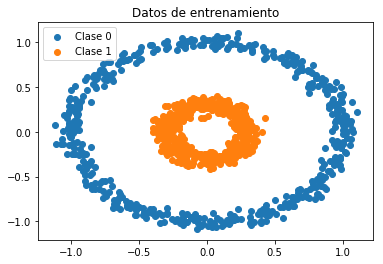

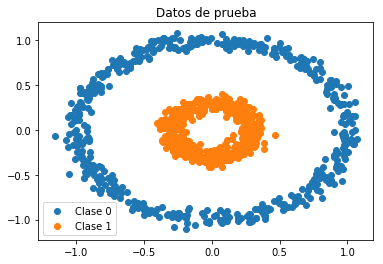

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state


def do_circles(n=2000, noisy_n=0.05):
    generator = check_random_state(10)
    linspace = np.linspace(0, 2 * np.pi, n // 2 + 1)[:-1]
    outer_circ_x = np.cos(linspace)
    outer_circ_y = np.sin(linspace)
    inner_circ_x = outer_circ_x * .3
    inner_circ_y = outer_circ_y * .3
    X = np.vstack((np.append(outer_circ_x, inner_circ_x),
                   np.append(outer_circ_y, inner_circ_y))).T
    y = np.hstack([np.zeros(n // 2, dtype=np.intp),
                   np.ones(n // 2, dtype=np.intp)])
    X += generator.normal(scale=noisy_n, size=X.shape)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, random_state=42)
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = do_circles()
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Clase 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Clase 1')
plt.legend()
plt.title('Datos de entrenamiento')
plt.show()
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], label='Clase 0')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], label='Clase 1')
plt.legend()
plt.title('Datos de prueba')
plt.show()

Vemos que los datos de entrenamiento y los de test son muy similares, y esto es debido a que son bastantes, pues podemos generar cuantos queramos con una distribución conocida.

Para lo que sigue de la actividad utilice la siguiente función para graficar las fronteras de clasificación
en base a la probabilidad que asigna cada algoritmo a la clase de un ejemplo.

In [23]:
def plot_classifier(clf, X_train, Y_train, X_test, Y_test, model_type, title='', far_away=2):
    f, axis = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(12, 8))
    axis.scatter(X_train[:, 0], X_train[:, 1], s=30, c=Y_train, zorder=10, cmap='cool')
    axis.scatter(X_test[:, 0], X_test[:, 1], s=20, c=Y_test, zorder=10, cmap='Greys')
    XX, YY = np.mgrid[-far_away:far_away:200j, -far_away:far_away:200j]
    if model_type == 'tree':
        Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:, 0]
    elif model_type == 'ann':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else:
        raise ValueError('model type not supported')
    Z = Z.reshape(XX.shape)
    Zplot = Z > 0
    axis.pcolormesh(XX, YY, Z, cmap='YlGn')
    axis.contour(XX, YY, Zplot, alpha=1, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
    levels=[-2, 0, 2])
    plt.legend()
    plt.title(title)
    plt.show()

Se agregó el parámetro `far_away`, para poder graficar una región mayor de $\mathbb{R}^2$ y ver la frontera de decisión en el caso de una sola capa oculta.

## (b)
Demuestre experimentalmente que una red neuronal artificial correspondiente a 1 sola neurona (i.e.
sin capas escondidas) no puede resolver satisfactoriamente el problema. Puede utilizar la función de
activación y el método de entrenamiento que prefiera. Sea convincente: por ejemplo, intente modificar
los parámetros de la máquina de aprendizaje, reportando métricas que permitan evaluar el desempeño
del modelo en el problema con cada cambio efectuado. Adapte también la función plot classifier para
que represente gráficamente la solución encontrada por la red neuronal. Describa y explique lo que
observa, reportando gráficos de la solución sólo para algunos casos representativos.

1000/1000 [==============================] - 0s 48us/step
Parámetros:
 Algoritmo de optimización: <class 'keras.optimizers.SGD'>
 Función de pérdida: mean_squared_error
 Función de activación: relu
 Inicialización de kernel: uniform
 Iteraciones (epochs): 50
 Tamaño de batch: 100
 Tasa de aprendizaje (learning rate): 1
Accuracy de entrenamiento: 0.493 Accuracy de test: 0.507
1000/1000 [==============================] - 0s 50us/step
Parámetros:
 Algoritmo de optimización: <class 'keras.optimizers.SGD'>
 Función de pérdida: mean_squared_error
 Función de activación: tanh
 Inicialización de kernel: uniform
 Iteraciones (epochs): 50
 Tamaño de batch: 100
 Tasa de aprendizaje (learning rate): 1
Accuracy de entrenamiento: 0.591 Accuracy de test: 0.543
1000/1000 [==============================] - 0s 49us/step
Parámetros:
 Algoritmo de optimización: <class 'keras.optimizers.SGD'>
 Función de pérdida: mean_squared_error
 Función de activación: softmax
 Inicialización de kernel: uniform
 Iteraci

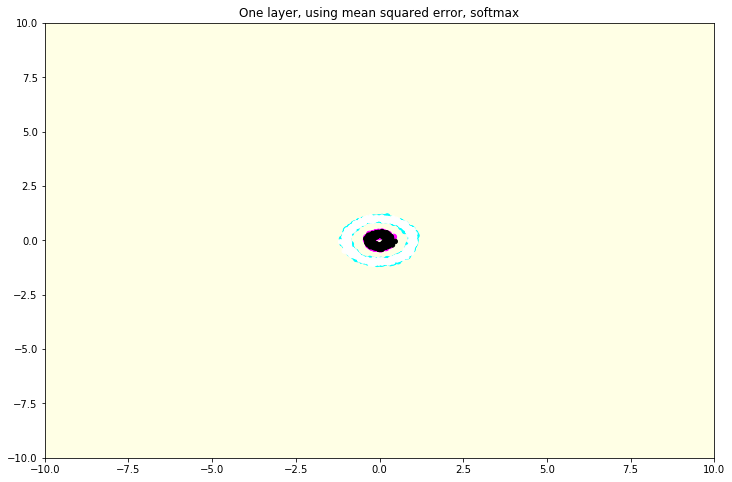

1000/1000 [==============================] - 0s 47us/step
Parámetros:
 Algoritmo de optimización: <class 'keras.optimizers.SGD'>
 Función de pérdida: mean_squared_error
 Función de activación: softmax
 Inicialización de kernel: uniform
 Iteraciones (epochs): 50
 Tamaño de batch: 100
 Tasa de aprendizaje (learning rate): 0.5
Accuracy de entrenamiento: 0.507 Accuracy de test: 0.493
1000/1000 [==============================] - 0s 47us/step
Parámetros:
 Algoritmo de optimización: <class 'keras.optimizers.SGD'>
 Función de pérdida: mean_squared_error
 Función de activación: softmax
 Inicialización de kernel: uniform
 Iteraciones (epochs): 50
 Tamaño de batch: 100
 Tasa de aprendizaje (learning rate): 0.8
Accuracy de entrenamiento: 0.507 Accuracy de test: 0.493
1000/1000 [==============================] - 0s 63us/step
Parámetros:
 Algoritmo de optimización: <class 'keras.optimizers.SGD'>
 Función de pérdida: mean_squared_error
 Función de activación: softmax
 Inicialización de kernel: unifor

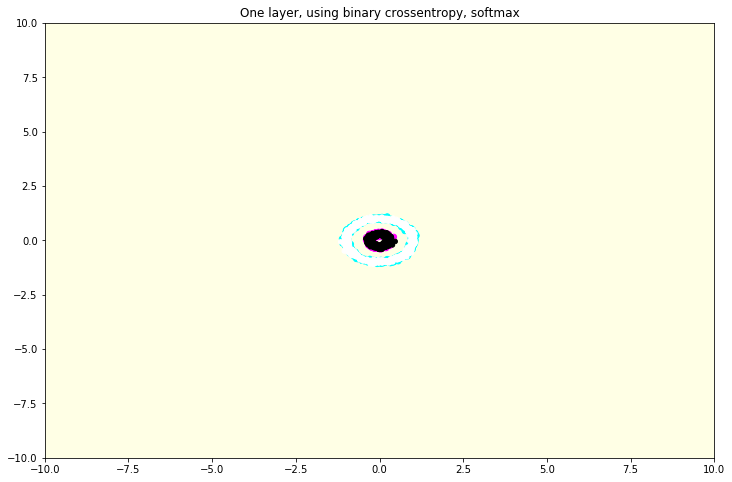

1000/1000 [==============================] - 0s 66us/step
Parámetros:
 Algoritmo de optimización: <class 'keras.optimizers.SGD'>
 Función de pérdida: binary_crossentropy
 Función de activación: relu
 Inicialización de kernel: uniform
 Iteraciones (epochs): 50
 Tamaño de batch: 100
 Tasa de aprendizaje (learning rate): 1
Accuracy de entrenamiento: 0.0 Accuracy de test: 0.0
1000/1000 [==============================] - 0s 48us/step
Parámetros:
 Algoritmo de optimización: <class 'keras.optimizers.SGD'>
 Función de pérdida: binary_crossentropy
 Función de activación: tanh
 Inicialización de kernel: uniform
 Iteraciones (epochs): 50
 Tamaño de batch: 100
 Tasa de aprendizaje (learning rate): 1
Accuracy de entrenamiento: 0.507 Accuracy de test: 0.493


In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD


def test_one_layer(optimization_algorithm,
                   loss_function,
                   activation_function,
                   kernel_initializer,
                   epochs,
                   batch_size,
                   lr=1):
    """Prueba una red de una capa, sin capas ocultas."""
    model = Sequential()
    model.add(Dense(1, input_dim=X_train.shape[1],
                    activation=activation_function, kernel_initializer=kernel_initializer))
    model.compile(optimizer=optimization_algorithm(lr=lr), loss=loss_function, metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    score_train, acc_train = model.evaluate(X_train, y_train)
    score_test, acc_test = model.evaluate(X_test, y_test)
    print('Parámetros:\n'
          ' Algoritmo de optimización: {}\n'
          ' Función de pérdida: {}\n'
          ' Función de activación: {}\n'
          ' Inicialización de kernel: {}\n'
          ' Iteraciones (epochs): {}\n'
          ' Tamaño de batch: {}\n'
          ' Tasa de aprendizaje (learning rate): {}\n'
          'Accuracy de entrenamiento: {} Accuracy de test: {}'.format(optimization_algorithm,
                                                                      loss_function,
                                                                      activation_function,
                                                                      kernel_initializer,
                                                                      epochs,
                                                                      batch_size,
                                                                      lr,
                                                                      acc_train, acc_test))
    return model
# Experimentamos diferentes funciones de activacion
model = test_one_layer(SGD, 'mean_squared_error', 'relu', 'uniform', 50, 100, lr=1)
model = test_one_layer(SGD, 'mean_squared_error', 'tanh', 'uniform', 50, 100, lr=1)
model = test_one_layer(SGD, 'mean_squared_error', 'softmax', 'uniform', 50, 100, lr=1)
plot_classifier(model, X_train, y_train, X_test, y_test, 'ann',
                title='One layer, using mean squared error, softmax', far_away=10)
# Experimentamos diferentes valores de learning rate
model = test_one_layer(SGD, 'mean_squared_error', 'softmax', 'uniform', 50, 100, lr=0.5)
model = test_one_layer(SGD, 'mean_squared_error', 'softmax', 'uniform', 50, 100, lr=0.8)
model = test_one_layer(SGD, 'mean_squared_error', 'softmax', 'uniform', 50, 100, lr=1.2)
model = test_one_layer(SGD, 'mean_squared_error', 'softmax', 'uniform', 50, 100, lr=1.5)
# Experimentamos diferentes valores de epochs
model = test_one_layer(SGD, 'mean_squared_error', 'softmax', 'uniform', 100, 100, lr=1.)
model = test_one_layer(SGD, 'mean_squared_error', 'softmax', 'uniform', 200, 100, lr=1.)
# Experimentamos diferentes valores de tamaño de batch
model = test_one_layer(SGD, 'mean_squared_error', 'softmax', 'uniform', 50, 50, lr=1.)
model = test_one_layer(SGD, 'mean_squared_error', 'softmax', 'uniform', 50, 200, lr=1.)
# Experimentamos diferentes funciones de pérdida
model = test_one_layer(SGD, 'hinge', 'softmax', 'uniform', 50, 100, lr=1)
model = test_one_layer(SGD, 'binary_crossentropy', 'softmax', 'uniform', 50, 100, lr=1)
plot_classifier(model, X_train, y_train, X_test, y_test, 'ann',
                title='One layer, using binary crossentropy, softmax', far_away=10)
# Experimentamos si para esta última función de pérdida, otras funciones de activación mejorarían
model = test_one_layer(SGD, 'binary_crossentropy', 'relu', 'uniform', 50, 100, lr=1)
model = test_one_layer(SGD, 'binary_crossentropy', 'tanh', 'uniform', 50, 100, lr=1)

De los puntajes de entrenamiento y test, podemos concluir que en ningún caso la red de una sola capa (ninguna oculta) es capaz de separar el conjunto. El accuracy siempre es alrededor de $0.5$, lo que indica que la mitad de los datos, aproximadamente, son bien clasificados, y la mitad mal. Esto se debe a que la frontera de decisión en estos casos es una recta, que al ver las gráficas vemos que queda fuera de los círculos. De hecho, se graficó una región mayor para ver la fronter de decisión, pero parece estar bastante lejos. Así, todos los datos son en verdad clasificados en la misma clase, tanto a los de test, como a los de entrenamiento. El único caso que más variaba en todas las pruebas realizadas era el de la activación `tanh`, que algunas veces daba un mejor accuracy.

En todos estos ejercicios, la manera correcta de evaluar diferentes modelos y parámetros de modelos debería ser usando validación cruzada, ya que no estaríamos sobreajustando a los datos de entrenamiento dados. Sin embargo, el objetivo en esta tarea es el estudio de los modelos no lineales, por lo que no nos preocuparemos de eso. Además, la distribución de los datos, al ser bastantes, se parece bastante a lo que realmente queremos separar, que son dos círculos.

## (c)
Demuestre experimentalmente que una red neuronal artificial con 1 capa escondida puede resolver satisfactoriamente el problema obtenido en (a). Puede utilizar la arquitectura y el método de entrenamiento
que prefiera, pero en esta actividad puede optar tranquilamente por usar los hiper-parámetros que se
entregan como referencia en el código de ejemplo. Cambie el número de neuronas $N_{h}$ en la red entre 2
y 32 en potencias de 2, graficando el error de entrenamiento y pruebas como función de $N_{h}$. Describa y
explique lo que observa. Utilice la función plot classifier, diseñada anteriormente, para construir gráficos
de la solución en algunos casos representativos.

1000/1000 [==============================] - 0s 51us/step
Para 1 unidades ocultas: Accuracy de entrenamiento: 0.705 Accuracy de test: 0.668


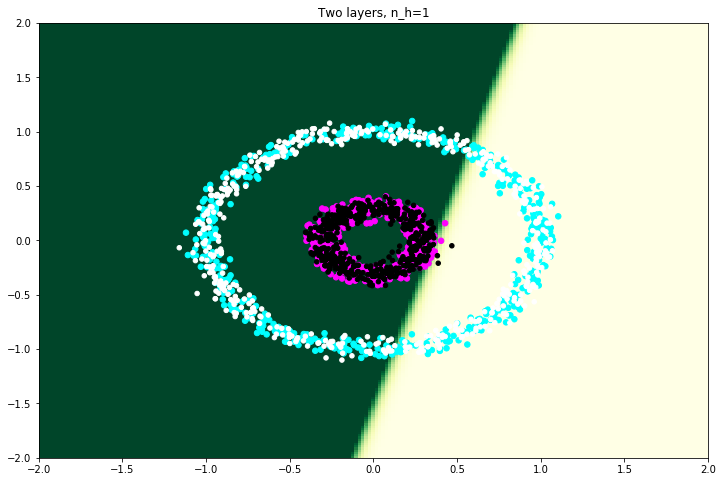

1000/1000 [==============================] - 0s 52us/step
Para 2 unidades ocultas: Accuracy de entrenamiento: 0.896 Accuracy de test: 0.851


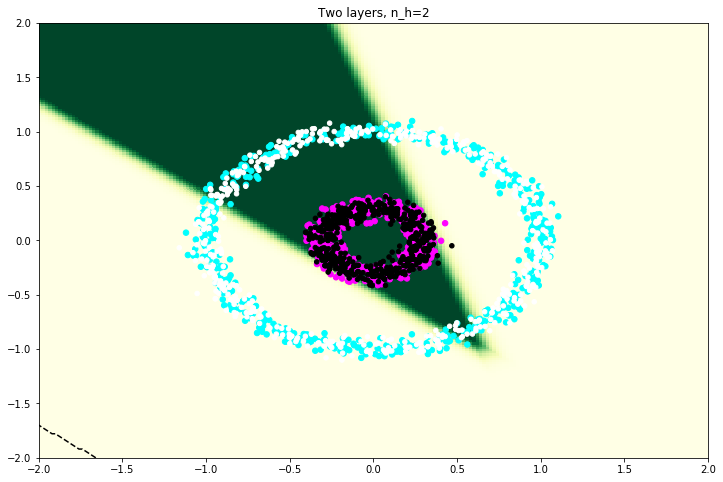

1000/1000 [==============================] - 0s 58us/step
Para 4 unidades ocultas: Accuracy de entrenamiento: 1.0 Accuracy de test: 1.0


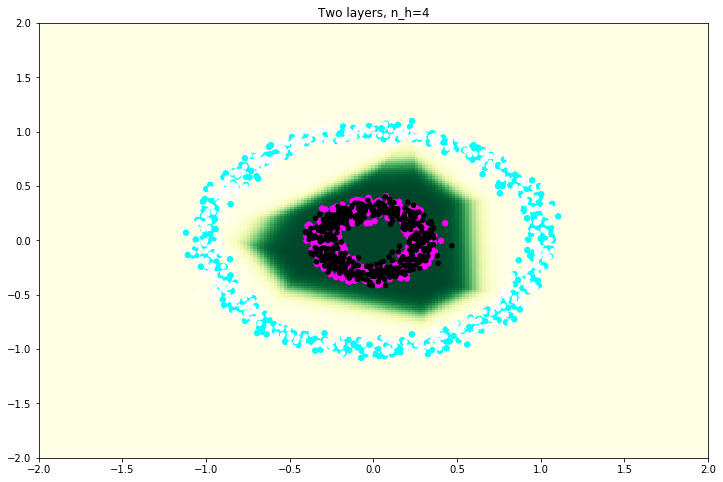

1000/1000 [==============================] - 0s 80us/step
Para 8 unidades ocultas: Accuracy de entrenamiento: 1.0 Accuracy de test: 1.0


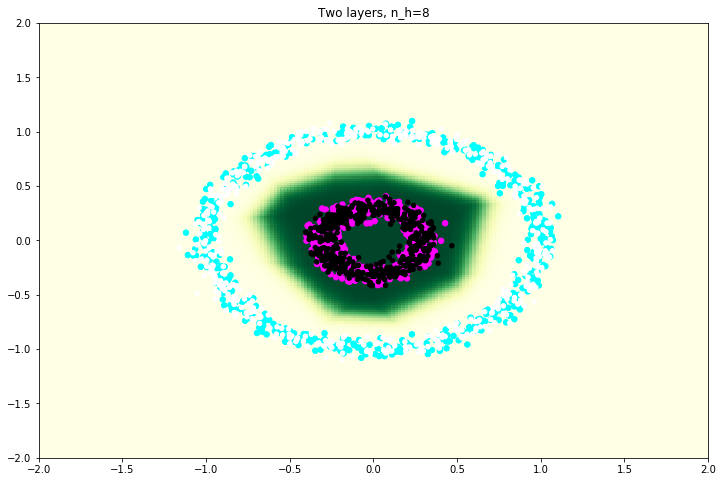

1000/1000 [==============================] - 0s 48us/step
Para 16 unidades ocultas: Accuracy de entrenamiento: 1.0 Accuracy de test: 1.0


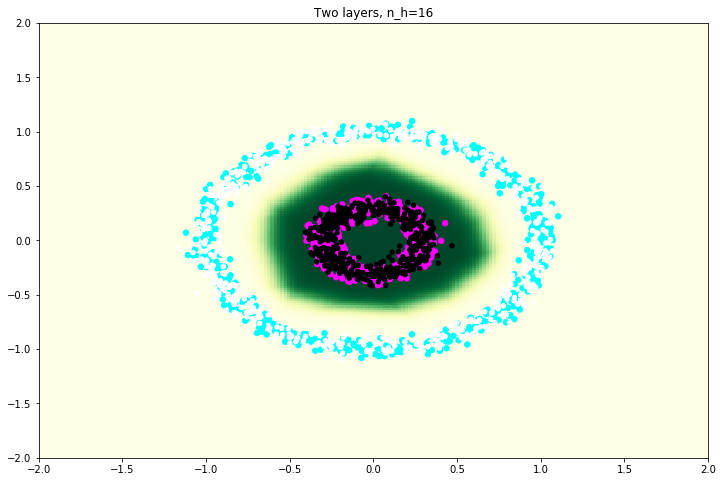

1000/1000 [==============================] - 0s 51us/step
Para 32 unidades ocultas: Accuracy de entrenamiento: 1.0 Accuracy de test: 1.0


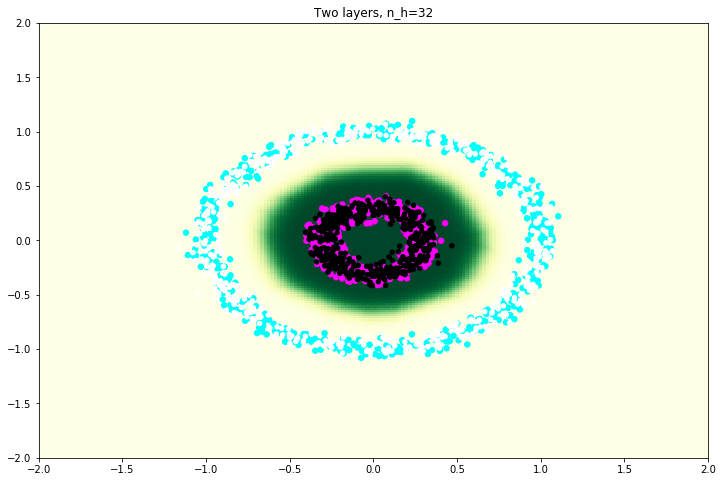

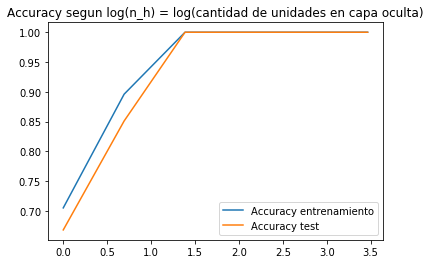

In [25]:
import math


def test_two_layer(optimization_algorithm,
                   loss_function,
                   activation_function_h,
                   activation_function_o,
                   kernel_initializer,
                   epochs,
                   batch_size,
                   n_h,
                   lr=1):
    """Prueba una red de dos capas, con una capa oculta."""
    model = Sequential()
    model.add(Dense(n_h, input_dim=X_train.shape[1],
                    activation=activation_function_h, kernel_initializer=kernel_initializer))
    model.add(Dense(1, activation=activation_function_o, kernel_initializer=kernel_initializer))
    model.compile(optimizer=optimization_algorithm(lr=lr), loss=loss_function, metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    score_train, acc_train = model.evaluate(X_train, y_train)
    score_test, acc_test = model.evaluate(X_test, y_test)
    return model, acc_train, acc_test
n_h = 1
potencias = []
train_accs = []
test_accs = []
for pot in range(6):
    model, train_acc, test_acc = test_two_layer(SGD, 'binary_crossentropy', 'relu', 'sigmoid', 'uniform',
                                                300, 100, n_h, lr=1)
    potencias.append(math.log(n_h))
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    print('Para {} unidades ocultas: Accuracy de entrenamiento: {} Accuracy de test: {}'.format(n_h, train_acc, test_acc))
    plot_classifier(model, X_train, y_train, X_test, y_test, 'ann', 'Two layers, n_h={}'.format(n_h))
    n_h *= 2
plt.plot(potencias, train_accs, label='Accuracy entrenamiento')
plt.plot(potencias, test_accs, label='Accuracy test')
plt.title('Accuracy segun log(n_h) = log(cantidad de unidades en capa oculta)')
plt.legend()
plt.show()

Podemos ver que:

- No es posible separar los datos con 1 unidad (ya que es equivalente al caso anterior, agregando un paso adicional en que podría ponderarse sólo por un escalar y función de activación).
- No es posible separar los datos con 2 unidades, ya que en este caso la frontera de decisión está compuesta por dos líneas rectas, como se ve en la gráfica.
- Ya con 4 unidades ocultas es posible separar los datos, si bien la forma geométrica podría fallar si tuviésemos muchos más datos.
- Con 8, 16 y 32 unidades, vemos que la frontera va a aproximándose a un círculo, donde se espera un menor error para futuros datos.

Al igual que la parte (b), la manera correcta sería usando validación cruzada, ya que podemos sobreajustar debido a los datos, por un lado, y también debido a los pesos iniciales usados para construir la red neuronal. Para evaluar, valdría la pena repetir el entrenamiento varias veces, comenzando con distintos pesos aleatorios, y tomar el valor promedio.

## (d)
Demuestre experimentalmente que stump (árbol de clasificación de 1 nivel) no puede resolver satisfactoriamente el problema anterior. Puede utilizar el criterio y la función de partición que prefiera. Sea
convincente: por ejemplo, intente modificar los parámetros de la máquina, reportando métricas que
permitan evaluar el desempeño del modelo en el problema con cada cambio efectuado. Adapte también
la función plot classifier para que represente gráficamente la solución encontrada por el árbol. Describa
y explique lo que observa, reportando gráficos de la solución sólo para algunos casos representativos.

Using gini and best: Train accuracy = 0.705 Test Accuracy = 0.67


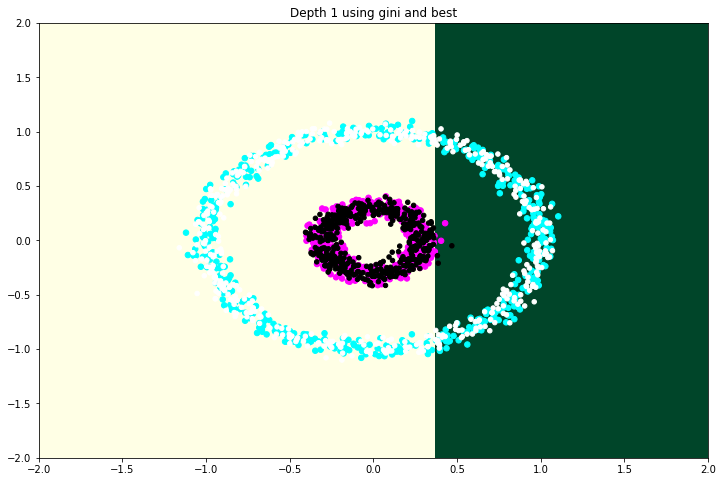

Using entropy and best: Train accuracy = 0.697 Test Accuracy = 0.658


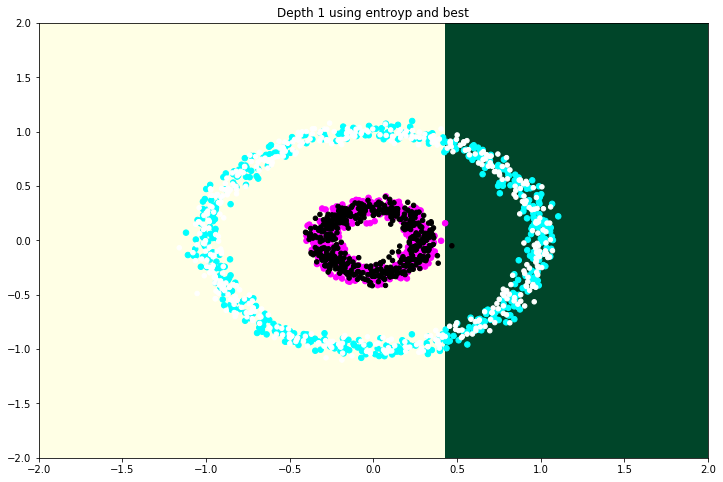

Using gini and random: Train accuracy = 0.672 Test Accuracy = 0.679


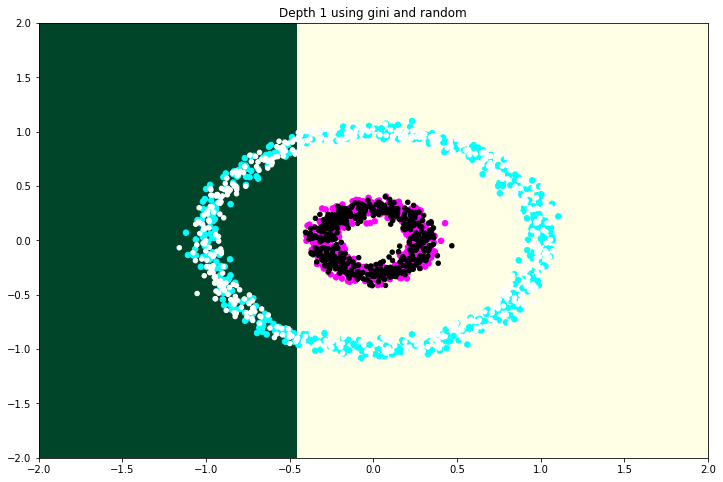

Using entropy and random: Train accuracy = 0.672 Test Accuracy = 0.679


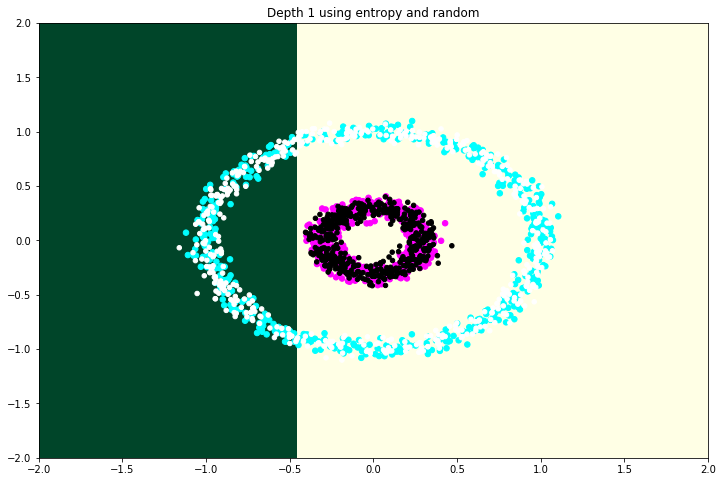

In [43]:
from sklearn.tree import DecisionTreeClassifier as Tree


# Gini impurity, best split
clf = Tree(criterion='gini', splitter='best', random_state=0, max_depth=1)
clf.fit(X_train, y_train)
acc_train = clf.score(X_train, y_train)
acc_test = clf.score(X_test, y_test)
print('Using gini and best: Train accuracy = {} Test Accuracy = {}'.format(acc_train, acc_test))
plot_classifier(clf, X_train, y_train, X_test, y_test, 'tree', title='Depth 1 using gini and best')
# Information gain, best split
clf = Tree(criterion='entropy', splitter='best', random_state=0, max_depth=1)
clf.fit(X_train, y_train)
acc_train = clf.score(X_train, y_train)
acc_test = clf.score(X_test, y_test)
print('Using entropy and best: Train accuracy = {} Test Accuracy = {}'.format(acc_train, acc_test))
plot_classifier(clf, X_train, y_train, X_test, y_test, 'tree', title='Depth 1 using entroyp and best')
# Gini impurity, random best split
clf = Tree(criterion='gini', splitter='random', random_state=0, max_depth=1)
clf.fit(X_train, y_train)
acc_train = clf.score(X_train, y_train)
acc_test = clf.score(X_test, y_test)
print('Using gini and random: Train accuracy = {} Test Accuracy = {}'.format(acc_train, acc_test))
plot_classifier(clf, X_train, y_train, X_test, y_test, 'tree', title='Depth 1 using gini and random')
# Information gain, random best split
clf = Tree(criterion='entropy', splitter='random', random_state=0, max_depth=1)
clf.fit(X_train, y_train)
acc_train = clf.score(X_train, y_train)
acc_test = clf.score(X_test, y_test)
print('Using entropy and random: Train accuracy = {} Test Accuracy = {}'.format(acc_train, acc_test))
plot_classifier(clf, X_train, y_train, X_test, y_test, 'tree', title='Depth 1 using entropy and random')

En este caso, la frontera de decisión es aun más drástica que en el caso de la red sin capa oculta, ya que es binaria (no hay matices). Como el árbol es construido dividiendo según un solo atributo, la frontera de decisión en este caso siempre será horizontal o vertical. En los casos probados, siempre fue vertical, probablemente debido al conjunto particular de entrenamiento obtenido al generar los datos.

Es interesante ver que, a diferencia de la red sin capa oculta, en este caso la frontera queda dentro del círculo. En particular, se ve que divide dejando todos los datos del círculo interno en la misma clase. Probablemente esto se deba a que hay más datos dentro del círculo que afuera, por lo que prefiera no equivocarse en éstos. Para validar esta afirmación, veamos cuántos datos hay de cada clase:

In [42]:
print('Clase 0: {} Clase 1: {}'.format(sum(y_train == 0), sum(y_train == 1)))
print('Ejemplo de clase 0: x[0] = {} , y[0] = {}'.format(X_train[0], y_train[0]))

Clase 0: 493 Clase 1: 507
Ejemplo de clase 0: x[0] = [-0.94839727  0.31975825] , y[0] = 0


Luego, efectivamente hay más datos de clase 1, que son los que están dentro del círculo.

Finalmente, vemos que ocurre el mismo fenómenos para los distintos tipos de criterios de división del árbol.

## (e)
Demuestre experimentalmente que un árbol de clasificación de múltiples niveles puede resolver satisfactoriamente el problema estudiado. Puede utilizar el criterio y la función de partición que prefiera,
pero puede optar tranquilamente por usar los hiper-parámetros que se entregan como referencia en el
código de ejemplo. Cambie el número de niveles admitidos en el árbol $N_{t}$ entre 2 y 20, graficando el
error de entrenamiento y pruebas como función de $N_{t}$. Describa y explique lo que observa. Utilice la
función plot classifier, diseñada anteriormente, para construir gráficos de la solución en algunos casos
representativos.

Usando gini y best, profundidad 1: Train accuracy = 0.672 Test Accuracy = 0.679
Usando gini y best, profundidad 2: Train accuracy = 0.672 Test Accuracy = 0.679


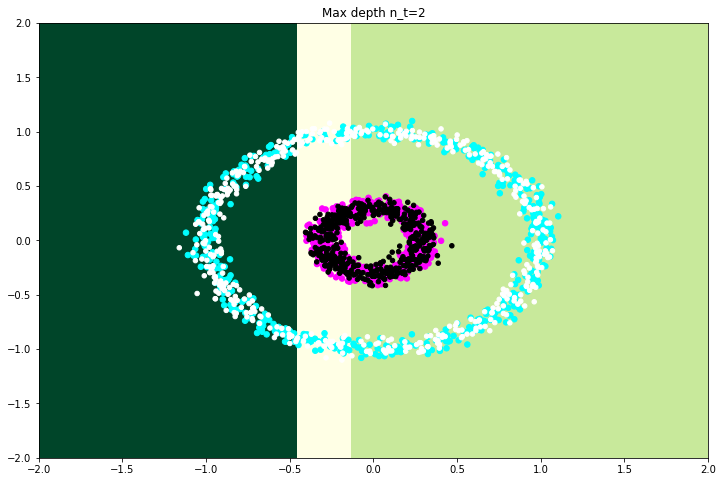

Usando gini y best, profundidad 3: Train accuracy = 0.877 Test Accuracy = 0.857
Usando gini y best, profundidad 4: Train accuracy = 0.887 Test Accuracy = 0.864


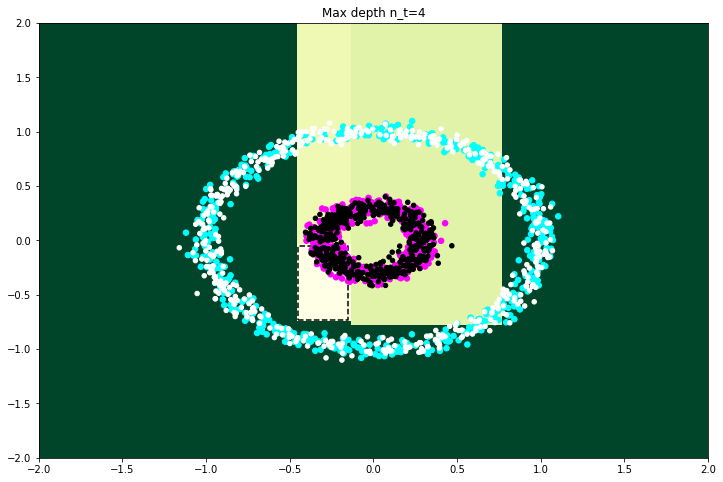

Usando gini y best, profundidad 5: Train accuracy = 0.888 Test Accuracy = 0.876
Usando gini y best, profundidad 6: Train accuracy = 0.96 Test Accuracy = 0.955
Usando gini y best, profundidad 7: Train accuracy = 1.0 Test Accuracy = 0.999


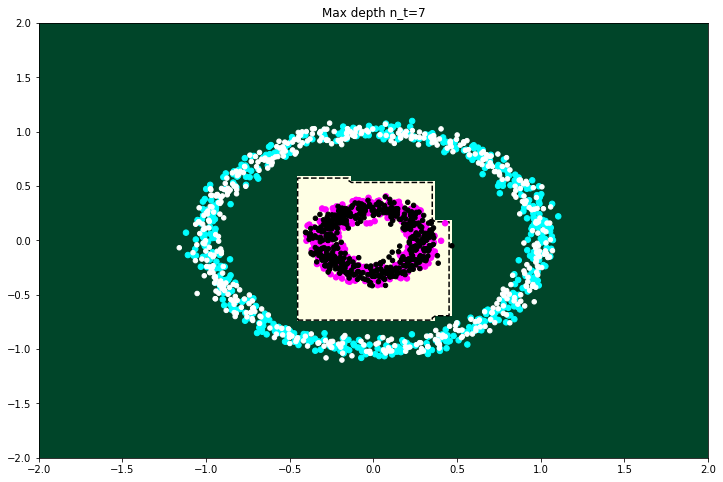

Usando gini y best, profundidad 8: Train accuracy = 1.0 Test Accuracy = 0.999
Usando gini y best, profundidad 9: Train accuracy = 1.0 Test Accuracy = 0.999
Usando gini y best, profundidad 10: Train accuracy = 1.0 Test Accuracy = 0.999
Usando gini y best, profundidad 11: Train accuracy = 1.0 Test Accuracy = 0.999
Usando gini y best, profundidad 12: Train accuracy = 1.0 Test Accuracy = 0.999
Usando gini y best, profundidad 13: Train accuracy = 1.0 Test Accuracy = 0.999
Usando gini y best, profundidad 14: Train accuracy = 1.0 Test Accuracy = 0.999
Usando gini y best, profundidad 15: Train accuracy = 1.0 Test Accuracy = 0.999
Usando gini y best, profundidad 16: Train accuracy = 1.0 Test Accuracy = 0.999
Usando gini y best, profundidad 17: Train accuracy = 1.0 Test Accuracy = 0.999
Usando gini y best, profundidad 18: Train accuracy = 1.0 Test Accuracy = 0.999
Usando gini y best, profundidad 19: Train accuracy = 1.0 Test Accuracy = 0.999
Usando gini y best, profundidad 20: Train accuracy = 1

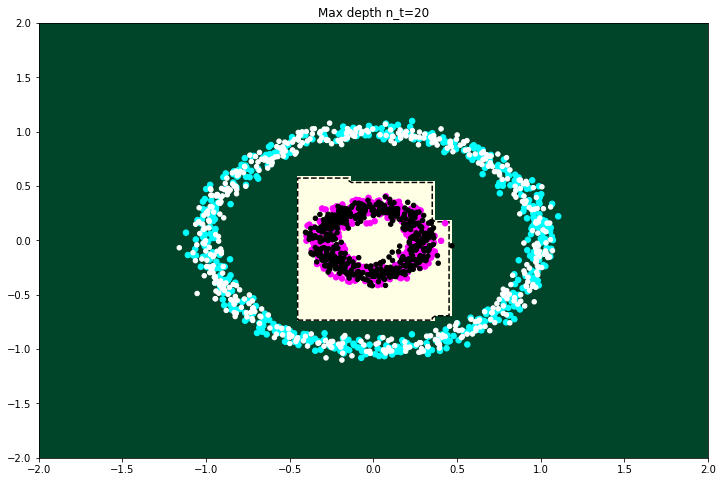

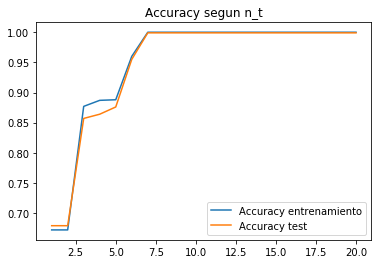

In [48]:
from sklearn.tree import DecisionTreeClassifier as Tree


def test_tree(criterion, splitter, max_depth):
    """Prueba un árbol de decisión con la profundidad dada."""
    clf = Tree(criterion='gini', splitter='random', random_state=0, max_depth=max_depth)
    clf.fit(X_train, y_train)
    acc_train = clf.score(X_train, y_train)
    acc_test = clf.score(X_test, y_test)
    print('Usando {} y {}, profundidad {}: Train accuracy = {} Test Accuracy = {}'.format(
        criterion, splitter, max_depth, acc_train, acc_test))
    return clf, acc_train, acc_test
valores = []
train_accs = []
test_accs = []
for n_t in range(1, 21):
    model, train_acc, test_acc = test_tree('gini', 'best', n_t)
    valores.append(n_t)
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    if n_t in [2, 4, 7, 20]:
        plot_classifier(model, X_train, y_train, X_test, y_test, 'tree', 'Max depth n_t={}'.format(n_t))
plt.plot(valores, train_accs, label='Accuracy entrenamiento')
plt.plot(valores, test_accs, label='Accuracy test')
plt.title('Accuracy segun n_t')
plt.legend()
plt.show()

Podemos ver cómo al ir agregando niveles al árbol, la frontera de decisión se va conformando por diversos cortes horizontales o verticales. Así, cuando la cantidad de niveles es 7, vemos que el árbol ya es capaz de decidir correctamente los datos, como se ve en el gráfico asociado y en el accuracy alcanzado. Finalmente, vemos que agregar más niveles no mejora prácticamente al árbol, con los datos que tenemos en este caso. De hecho, al ver el gráfico para 20 niveles, vemos que es muy similar al de 7 niveles.

## (f)
Como ya se demostró experimentalmente que este problema es linealmente inseperable, ahora se pide
experimentar otra alternativa. Para ello deberá realizar una proyección de los datos a un nuevo espacio
dimensional (manifold) en el cual se reconozcan sus patrones no lineales, para poder trabajarlos con
fronteras lineales. Utilice la técnica de PCA con la ayuda de un Kernel Gaussiano ([2]) para extraer
sus vectores con dimensión infinita de mayor varianza.

In [49]:
from sklearn.decomposition import KernelPCA


kpca = KernelPCA(n_components=2, kernel='rbf', gamma=5)
kpca = kpca.fit(X_train)
Xkpca_train = kpca.transform(X_train)
Xkpca_test = kpca.transform(X_test)

## (g)
Ajuste un algoritmo de aprendizaje con fronteras lineal para los datos proyectados en este nuevo espacio
que captura sus componentes no lineales, muestre gráficamente que el problema ahora puede ser resulto
con estos métodos. Reporte métricas para evaluar el desempeño, comente y concluya.

Score train: 1.0 Score test: 1.0


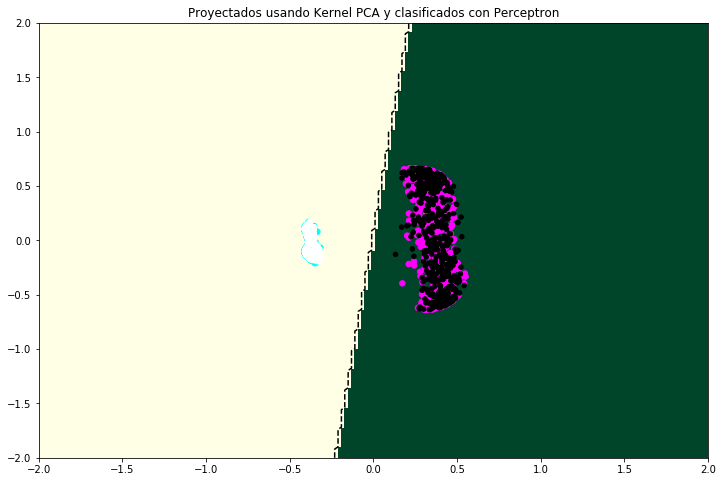

In [78]:
from sklearn.linear_model import Perceptron


model = Perceptron()
model.fit(Xkpca_train, y_train)
score_train = model.score(Xkpca_train, y_train)
score_test = model.score(Xkpca_test, y_test)
print('Score train: {} Score test: {}'.format(score_train, score_test))
plot_classifier(model, Xkpca_train, y_train, Xkpca_test, y_test, 'ann',
                title='Proyectados usando Kernel PCA y clasificados con Perceptron')

Podemos ver aquí que Kernel PCA proyectó todos los datos del círculo interior a la derecha, y todos los del círculo exterior a la izquierda. Así, al usar un modelo lineal de Perceptrón, podemos ver que es capaz de separar los datos sin problema. Esto ocurre ya que el Kernel Gaussiano (Radial Base Function), es simétrico desde el punto donde se proyecta, en este caso, el centro del plano. Así, basta ver la distancia desde el centro del plano para separar los datos.

# 2. Bike Sharing: Predicción de Demanda Horaria
En esta sección simularemos nuestra participación en el desafı́o Bike Sharing Demand de Kaggle [3]. El
objetivo es predecir la demanda de bicicletas sobre la red Capital Bikeshare de la ciudad de Washington,
D.C., en función de la hora del dı́a y otras variables descritas en la tabla 1. En principio, y como muestra
la figura, la función es altamente no lineal y no determinista como función de la hora del dı́a. Su objetivo
será entrenar un modelo para obtener un puntaje correspondiente al top-100 del "leaderboard" final, es
decir superior o igual a $0.37748$. La función utilizada para evaluar este concurso Kaggle se proporciona en la
siguiente ecuación:
\begin{equation}
E_{\text{bikes}} \left( y, \hat{y} \right) = \frac{1}{n}\sum_{i} \left( \ln \left( y_{i} + 1 \right) - \ln \left( \hat{y}_{i} + 1 \right) \right)^{2}
\end{equation}
donde $y$, $\hat{y} \in \mathbb{R}^{n}$ denotan los vectores de observaciones y predicciones respectivamente.

Como el dataset de pruebas original no está disponible se fabricará uno, correspondiente al $20 \%$ de los
datos de entrenamiento. Además, se pondrá a su disposición un subconjunto independiente de datos con
propósitos de validación. Usted podrá descargar los archivos correspondientes al subconjunto de entrenamiento y pruebas a utilizar ejecutando los siguientes comandos:

```
wget http://octopus.inf.utfsm.cl/~ricky/bike_sharing_train.csv
wget http://octopus.inf.utfsm.cl/~ricky/bike_sharing_val.csv
wget http://octopus.inf.utfsm.cl/~ricky/bike_sharing_test.csv
```

| Atributo   | Descripción                                                                                |
|------------|--------------------------------------------------------------------------------------------|
| datetime   | hourly date + timestamp                                                                    |
| season     | 1 = spring, 2 = summer, 3 = fall, 4 = winter                                               |
| holiday    | whether the day is considered a holiday                                                    |
| workingday | whether the day is neither a weekend nor holiday                                           |
| weather    | 1: Clear, Few clouds, Partly cloudy, Partly cloudy                                         |
|            | 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                            |
|            | 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds |
|            | 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                              |
| temp       | temperature in Celsius                                                                     |
| atemp      | ?feels like? temperature in Celsius                                                        |
| humidity   | relative humidity                                                                          |
| windspeed  | wind speed                                                                                 |
| casual     | number of non-registered user rentals initiated                                            |
| registered | number of registered user rentals initiated                                                |
| count      | number of total rentals                                                                    |

Tabla 1: Atributos para el Problema 2 (Bike Sharing).

## (a)
Cargue los datos de entrenamiento y pruebas como dataframes de pandas. Describa las variables involucradas en el problema, explorando el tipo de datos de que se trata, el número de valores distintos y, si
corresponde, un gráfico (e.g. un histograma) que resuma su comportamiento. Su primera operación de
pre-procesamiento de datos será obtener la hora del dı́a desde el campo fecha (que en este momento es
de tipo string), creando una nueva columna denominada hour y de tipo int. Para hacer esta operación
se concatenarán los dataframes de entrenamiento y pruebas y luego se volverán a separar manteniendo
la separación original.

In [2]:
import pandas as pd
import numpy as np


def reload_data(print_info=True):
    dftrain = pd.read_csv('bike_sharing_train.csv')
    dfval = pd.read_csv('bike_sharing_val.csv')
    dftest = pd.read_csv('bike_sharing_test.csv')
    ntrain = len(dftrain)
    nval = len(dftrain) + len(dfval)
    df = pd.concat([dftrain, dfval, dftest])
    if print_info:
        print('Hay {} datos de entrenamiento, {} de validacion y {} de test'.format(ntrain, len(dfval), len(dftest)))
        print '\nSummary - dataframe completo:\n'
        print df.describe()
    df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
    df['hour'] = pd.to_numeric(df['hour'])
    return df, ntrain, nval

df, ntrain, nval = reload_data()

Hay 6562 datos de entrenamiento, 2177 de validacion y 2147 de test

Summary - dataframe completo:

         Unnamed: 0        season       holiday    workingday       weather  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean    5442.500000      2.506614      0.028569      0.680875      1.418427   
std     3142.661849      1.116174      0.166599      0.466159      0.633839   
min        0.000000      1.000000      0.000000      0.000000      1.000000   
25%     2721.250000      2.000000      0.000000      0.000000      1.000000   
50%     5442.500000      3.000000      0.000000      1.000000      1.000000   
75%     8163.750000      4.000000      0.000000      1.000000      2.000000   
max    10885.000000      4.000000      1.000000      1.000000      4.000000   

              temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084 

23    456
20    456
16    456
17    456
18    456
15    456
12    456
19    456
13    456
21    456
14    456
22    456
6     455
11    455
10    455
9     455
7     455
8     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: hour, dtype: int64


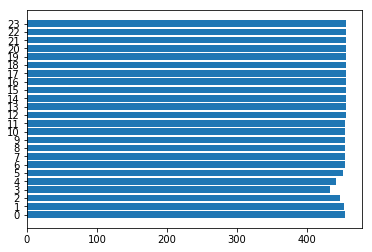

In [71]:
import matplotlib.pyplot as plt

def describir_variable_discreta(nombre_variable):
    datos = df[nombre_variable].value_counts()
    print(datos)
    plt.barh(datos.keys(), datos.values, align='center')
    plt.yticks(datos.keys())
    plt.show()


describir_variable_discreta('hour')

Esto significa que no todas las horas están igualmente representadas, aunque la cantidad es bastante similar. El valor de la derecha es cuántos datos hay para cada hora.

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64


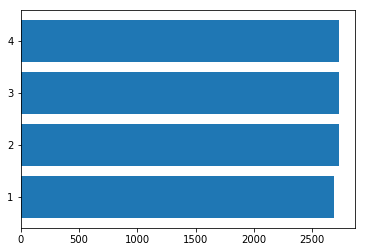

In [6]:
describir_variable_discreta('season')

Season también tiene una cantidad diferente de datos para cada tipo de estación, aunque relativamente similar.

0    10575
1      311
Name: holiday, dtype: int64


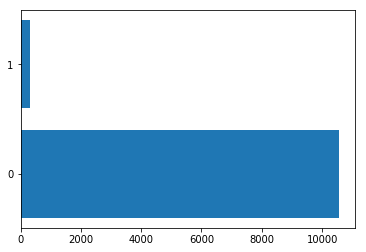

In [7]:
describir_variable_discreta('holiday')

Hay muchos más días normales que feriados.

1    7412
0    3474
Name: workingday, dtype: int64


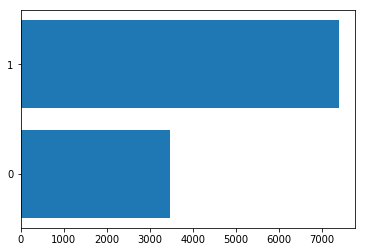

In [8]:
describir_variable_discreta('workingday')

Muchos más días de trabajo que días feriados o fines de semana.

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64


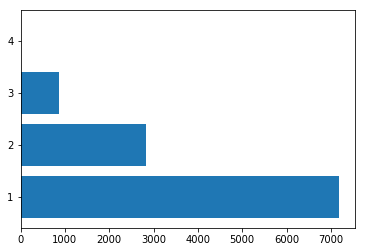

In [9]:
describir_variable_discreta('weather')

El clima está bastante desbalanceado, con una de las clases (4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog), con un solo dato.

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64


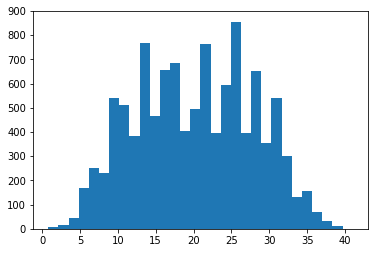

AndersonResult(statistic=67.806417709767629, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [10]:
from scipy.stats import anderson

def describir_variable_numerica(nombre_variable):
    print(df[nombre_variable].describe())
    plt.hist(df[nombre_variable], bins=30)
    plt.show()

describir_variable_numerica('temp')
print(anderson(df['temp'], dist='norm'))

La variable temp (temperatura) sigue la distribución mostrada. Según el test de [Anderson-Darling](https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test), no sería una distribución normal, aun cuando se le parece en la figura. Este test entrega un valor más alto cuando los datos difieren de la distribución indicada. Así, según el nivel de significancia (el $\alpha$ porcentaje de datos más alejados de la media en el caso de una normal), entrega el $p$-valor crítico alcanzado por la distribución, y un valor de estadístico, que mientras menor sea, más parecido a la distribución se es. En este caso el valor del estadístico es $67.8$.

count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64


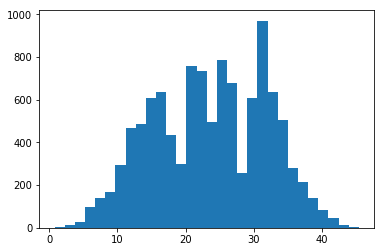

AndersonResult(statistic=66.920979546921444, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [12]:
describir_variable_numerica('atemp')
print(anderson(df['atemp'], dist='norm'))

La sensación térmica atemp parece aun más una Gaussiana.

count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64


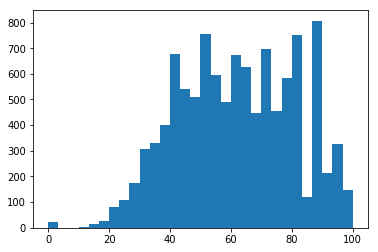

AndersonResult(statistic=51.138178122431782, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [13]:
describir_variable_numerica('humidity')
print(anderson(df['humidity'], dist='norm'))

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64


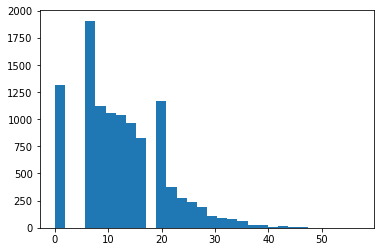

AndersonResult(statistic=98.057188874050553, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
AndersonResult(statistic=inf, critical_values=array([ 0.922,  1.078,  1.341,  1.606,  1.957]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [14]:
describir_variable_numerica('windspeed')
print(anderson(df['windspeed'], dist='norm'))
print(anderson(df['windspeed'], dist='expon'))

count    10886.000000
mean        36.021955
std         49.960477
min          0.000000
25%          4.000000
50%         17.000000
75%         49.000000
max        367.000000
Name: casual, dtype: float64


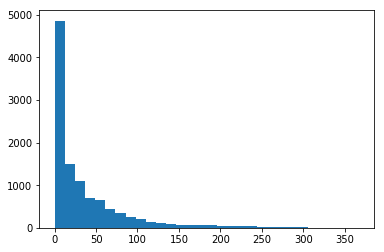

AndersonResult(statistic=948.02912961600668, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
AndersonResult(statistic=inf, critical_values=array([ 0.922,  1.078,  1.341,  1.606,  1.957]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [15]:
describir_variable_numerica('casual')
print(anderson(df['casual'], dist='norm'))
print(anderson(df['casual'], dist='expon'))

count    10886.000000
mean       155.552177
std        151.039033
min          0.000000
25%         36.000000
50%        118.000000
75%        222.000000
max        886.000000
Name: registered, dtype: float64


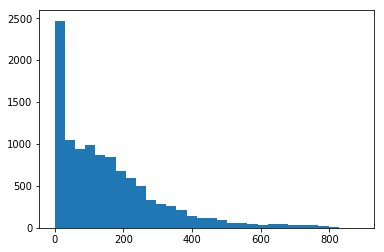

AndersonResult(statistic=383.44939787196745, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
AndersonResult(statistic=inf, critical_values=array([ 0.922,  1.078,  1.341,  1.606,  1.957]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [16]:
describir_variable_numerica('registered')
print(anderson(df['registered'], dist='norm'))
print(anderson(df['registered'], dist='expon'))

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64


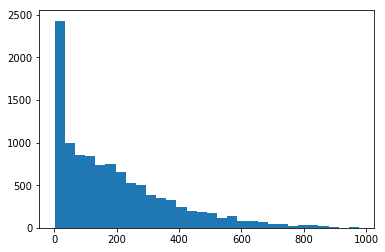

AndersonResult(statistic=358.33437668286388, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
AndersonResult(statistic=117.76745092265446, critical_values=array([ 0.922,  1.078,  1.341,  1.606,  1.957]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [17]:
describir_variable_numerica('count')
print(anderson(df['count'], dist='norm'))
print(anderson(df['count'], dist='expon'))

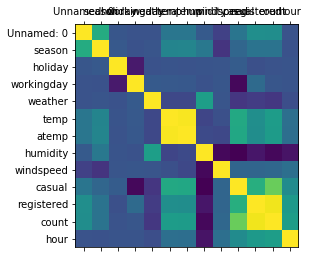

In [18]:
corr = df.corr()
plt.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

Esta última matriz en colores muestra la correlación entre los atributos. Vemos que la temperatura temp y la sensación térmica atemp están muy correlacionadas, al igual que la cantidad de arriendos por usuarios registrados, no registrados y la cantidad total de arriendos. La importancia de conocer esta matriz es ver que no todos los atributos son independientes.

## (b)
Entrene un árbol de regresión para resolver el problema usando parámetros por defecto. Con este
fin, construya una matriz $X_{\text{train}}$ de forma $n_{\text{train}} \times d_{1}$ que contenga los datos de entrenamiento en sus
filas, seleccionando las columnas que desee/pueda utilizar para el entrenamiento. Implemente además, la
función de evaluación que hemos definido anteriormente para este problema. Evalúe el árbol de regresión
ajustado a los datos de entrenamiento sobre el conjunto de entrenamiento y pruebas. Construya un
gráfico que compare las predicciones con los valores reales. En este punto usted debiese tener un modelo
con puntaje del orden de $0.59$, lo que lo dejará más o menos en la posición $2140$ de la competencia.

Hay 6562 datos de entrenamiento, 2177 de validacion y 2147 de test

Summary - dataframe completo:

         Unnamed: 0        season       holiday    workingday       weather  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean    5442.500000      2.506614      0.028569      0.680875      1.418427   
std     3142.661849      1.116174      0.166599      0.466159      0.633839   
min        0.000000      1.000000      0.000000      0.000000      1.000000   
25%     2721.250000      2.000000      0.000000      0.000000      1.000000   
50%     5442.500000      3.000000      0.000000      1.000000      1.000000   
75%     8163.750000      4.000000      0.000000      1.000000      2.000000   
max    10885.000000      4.000000      1.000000      1.000000      4.000000   

              temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084 

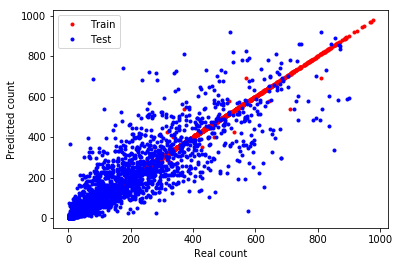

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor as Tree
import matplotlib.pyplot as plt


def eval_bikemodel(y_predict, y_true):
    diff = np.log(y_predict + 1.0) - np.log(y_true + 1.0)
    return np.sqrt(np.sum(np.square(diff)) / len(y_predict))

df, ntrain, nval = reload_data()
Xdf = df.loc[:, ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
                 'humidity', 'windspeed', 'hour']]
Ydf = df.loc[:, 'count']


def do_cross(Xdf, Ydf, model_gen, test_percent=0.3, iterations=10, out_log=False, standardize=False):
    score_test = 0.
    train_eval = 0.
    test_eval = 0.
    for one in range(iterations):
        X_train, X_test, Y_train, Y_test = train_test_split(Xdf.values, Ydf.values, test_size=test_percent)
        model = model_gen()
        if standardize:
            scalerX = StandardScaler()
            X_train = scalerX.fit_transform(X_train)
            X_test = scalerX.transform(X_test)
        model.fit(X_train, Y_train)
        score_test += model.score(X_test, Y_test) / iterations
        Y_pred_train = model.predict(X_train)
        Y_pred_test = model.predict(X_test)
        if out_log:
            Y_pred_train = np.exp(Y_pred_train) - 1.0
            Y_pred_test = np.exp(Y_pred_test) - 1.0
            Y_train = np.exp(Y_train) - 1.0
            Y_test = np.exp(Y_test) - 1.0
        train_eval += eval_bikemodel(np.maximum([0.0] * len(Y_pred_train), Y_pred_train),
                                     np.maximum([0.0] * len(Y_train), Y_train)) / iterations
        test_eval += eval_bikemodel(np.maximum([0.0] * len(Y_pred_test), Y_pred_test),
                                    np.maximum([0.0] * len(Y_test), Y_test)) / iterations
    return score_test, train_eval, test_eval


def model_gen():
    return Tree(random_state=0)

score_test, train_eval, test_eval = do_cross(Xdf, Ydf, model_gen)
print 'AVERAGE MODEL SCORE = {}'.format(score_test)
print 'AVERAGE EVAL TRAIN = {}'.format(train_eval)
print 'AVERAGE EVAL TEST = {}'.format(test_eval)

def show_best_model(Xdf, Ydf, model, out_log=False, standardize=False):
    X_train_kaggle = Xdf[:ntrain]
    Y_train_kaggle = Ydf[:ntrain]
    X_val_kaggle = Xdf[ntrain:nval]
    Y_val_kaggle = Ydf[ntrain:nval]
    X_test_kaggle = Xdf[nval:]
    Y_test_kaggle = Ydf[nval:]
    if standardize:
        scalerX = StandardScaler()
        X_train_kaggle = scalerX.fit_transform(X_train_kaggle)
        X_test_kaggle = scalerX.transform(X_test_kaggle)
    model.fit(X_train_kaggle, Y_train_kaggle)
    Y_pred_train = model.predict(X_train_kaggle)
    Y_pred_val = model.predict(X_val_kaggle)
    Y_pred_test = model.predict(X_test_kaggle)
    if out_log:
        Y_pred_train = np.exp(Y_pred_train) - 1.0
        Y_pred_val = np.exp(Y_pred_val) - 1.0
        Y_pred_test = np.exp(Y_pred_test) - 1.0
        Y_train_kaggle = np.exp(Y_train_kaggle) - 1.0
        Y_val_kaggle = np.exp(Y_val_kaggle) - 1.0
        Y_test_kaggle = np.exp(Y_test_kaggle) - 1.0
    kagg_train = eval_bikemodel(Y_pred_train, Y_train_kaggle)
    kagg_val = eval_bikemodel(Y_pred_val, Y_val_kaggle)
    kagg_test = eval_bikemodel(Y_pred_test, Y_test_kaggle)
    print 'KAGG EVAL TRAIN = %f' % kagg_train
    print 'KAGG EVAL VALIDATION = %f' % kagg_val
    print 'KAGG EVAL TEST = %f' % kagg_test
    plt.plot(Y_train_kaggle, Y_pred_train, '.', color='red', label='Train')
    plt.plot(Y_test_kaggle, Y_pred_test, '.', color='blue', label='Test')
    plt.xlabel('Real count')
    plt.ylabel('Predicted count')
    plt.legend()
    plt.show()

show_best_model(Xdf, Ydf, model_gen())

Se dejaron afuera los atributos count, casual y registered, ya que ellos cuentan la cantidad de arriendos, justamente lo que queremos pronosticar.

Se decidió hacer cross validation, para usar todos los datos y medir de mejor manera el desempeño de los modelos, en especial en lo que viene más adelante. El gráfico fue generado entrenando el modelo usando el conjunto de entrenamiento de Kaggle. Los puntos rojos son los de entrenamiento, que se ve están mejor ajustados. En este caso, el score para el conjunto de test de Kaggle es $0.574$.

## (c)
Mejore el árbol de regresión definido en el punto anterior haciendo modificaciones a los hiper-parámetros del modelo. Por ejemplo, como estos modelos tienden a sobre-ajustar, podrı́a intentar limitar la
profundidad del árbol (¿Por qué esto debiese ayudar?). Naturalmente, está absolutamente prohibido
tomar este tipo de decisiones en función del resultado de pruebas. Debe realizar estas elecciones evaluando sobre el conjunto de validación. Si no desea utilizarlo, y prefiere implementar validación cruzada
u otra técnica automática, tiene la ventaja de poder usar el conjunto de validación como parte del
entrenamiento. Con estas modificaciones debiese poder mejorar su ranking en unas $300$ posiciones.

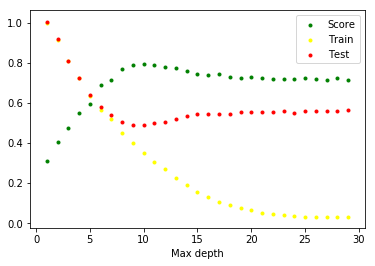

Mejor depth para score: 0.794882037465 : 10
Mejor depth para test: 0.488905947697 : 10
SCORE PARA max_depth=10: 0.794882037465
KAGG EVAL TRAIN = 0.338635
KAGG EVAL VALIDATION = 0.476274
KAGG EVAL TEST = 0.516396


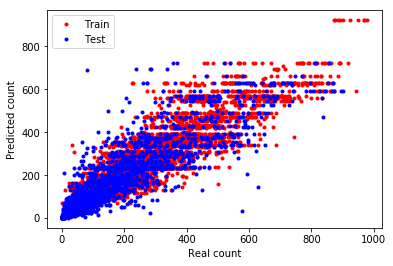

In [13]:
Xdf = df.loc[:, ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
                 'humidity', 'windspeed', 'hour']]
Ydf = df.loc[:, 'count']

scores = []
train_evals = []
test_evals = []

max_depth=None

def model_gen():
    return Tree(random_state=0, max_depth=max_depth)

max_depth_tries = list(range(1, 30))
best_score = -1
best_test = 1
best_score_depth = 0
best_test_depth = 0
for depth in max_depth_tries:
    max_depth = depth
    score_test, train_eval, test_eval = do_cross(Xdf, Ydf, model_gen)
    scores.append(score_test)
    train_evals.append(train_eval)
    test_evals.append(test_eval)
    if best_score < score_test:
        best_score = score_test
        best_score_depth = depth
    if best_test > test_eval:
        best_test = test_eval
        best_test_depth = depth

plt.scatter(max_depth_tries, scores, color='green', label='Score', marker='.')
plt.scatter(max_depth_tries, train_evals, color='yellow', label='Train', marker='.')
plt.scatter(max_depth_tries, test_evals, color='red', label='Test', marker='.')
plt.xlabel('Max depth')
plt.legend()
plt.show()

print('Mejor depth para score: {} : {}'.format(best_score, best_score_depth))
print('Mejor depth para test: {} : {}'.format(best_test, best_test_depth))

max_depth = 10  # Mejor parametro segun cross validation
print('SCORE PARA max_depth={}: {}'.format(max_depth, scores[max_depth - 1]))
show_best_model(Xdf, Ydf, model_gen())

Podemos ver que limitando la altura del árbol conseguimos una leve mejora en el desempeño, y elegimos el mejor valor para el parámetro de profundidad como $10$, usando cross validation. Al ver el gráfico de los valores predichos, vemos que al limitar la altura del árbol, las predicciones ya son mucho menos ajustadas, resultando en "saltos" en los valores predichos. Esto hace que el desempeño en el conjunto de entrenamiento sea mucho menor, pero en test levemente mejor, en promedio.
El score conseguido con este modelo es $0.79$, y para el conjunto de Kaggle de test, $0.516$.

## (d)
Mejore el árbol de regresión definido en el punto anterior haciendo modificaciones sobre la representación utilizada para aprender desde los datos. Por ejemplo, los histogramas que construyó en el punto
(a) ası́ como la forma especial de la función de evaluación, sugieren una cierta transformación de la
variable respuesta. Podrı́a intentar también normalizando los datos o normalizando la respuesta. Otra
opción es intentar rescatar algo más acerca de la fecha (anteriormente sólo se extrajo la hora), como por
ejemplo el año o el dı́a de la semana (’lunes’,’martes’, etc) que corresponde. Sea creativo, este paso le
debiese reportar un salto de calidad muy significativo. Una observación importante es que si hace una
transformación a la variable respuesta (por ejemplo raı́z cuadrada), debe invertir esta transformación
antes de evaluar el desempeño con eval bikemodel (por ejemplo, elevar al cuadrado si tomó raı́z cuadrada). Con modificaciones de este tipo, podrı́a mejorar su ranking en unas 1000 posiciones, entrando
ya al top-1000 con un score del orden de $0.45$.

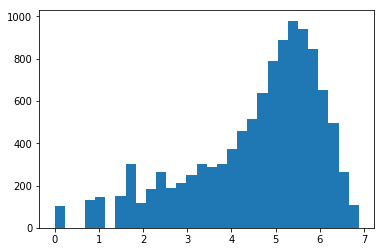

AndersonResult(statistic=303.54826663475978, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [39]:
plt.hist(df['count'].apply(np.log), bins=30)
plt.show()
print(anderson(df['count'].apply(np.log), dist='norm'))

Como vimos anteriormente, la variable de salida tiene una distribución que decae exponencialmente. Usaremos entonces la variable modificada aplicando $\log$.

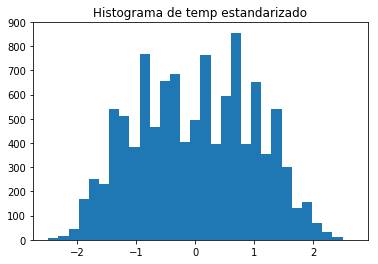

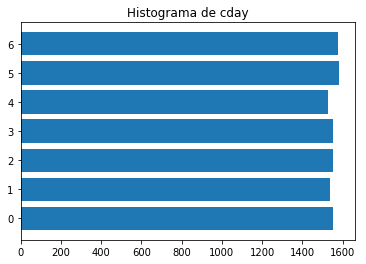

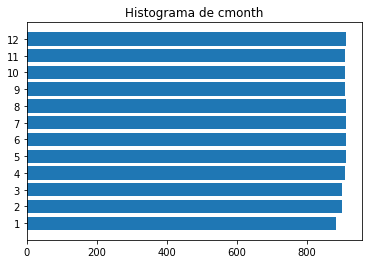

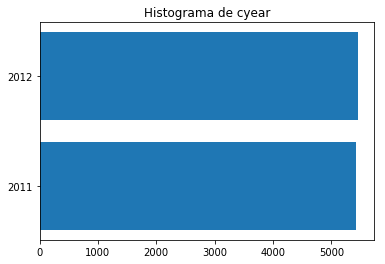

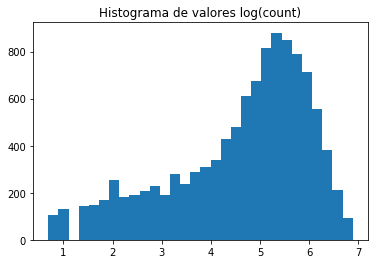

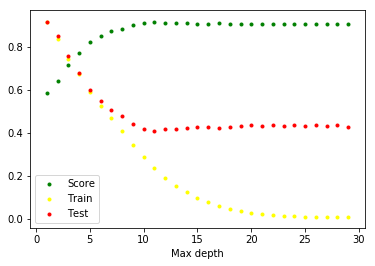

Mejor depth para score: 0.916379276109 : 11
Mejor depth para test: 0.410196574488 : 11
SCORE PARA max_depth=12: 0.913772448317
KAGG EVAL TRAIN = 0.177378
KAGG EVAL VALIDATION = 0.427436
KAGG EVAL TEST = 0.483776


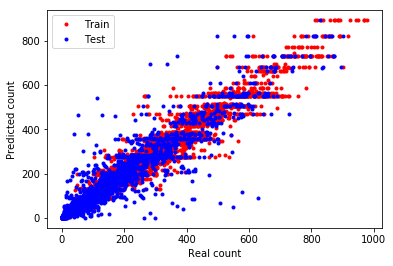

In [15]:
from sklearn.preprocessing import StandardScaler


df, ntrain, nval = reload_data(print_info=False)

df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek  # 0: lunes, 6: domingo
df['cmonth'] = pd.to_datetime(df['datetime']).dt.month
df['cyear'] = pd.to_datetime(df['datetime']).dt.year
# df['cday'] = pd.to_numeric(df['cday'])
df['lwindspeed'] = df['windspeed'].apply(np.log)
Xdf = df.loc[:, ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
                 'humidity', 'windspeed', 'hour', 'cday', 'cmonth', 'cyear']]
Ydf = (df.loc[:, 'count'] + 1.0).apply(np.log)

# Estandarizamos algunas variables numericas
scaler = StandardScaler().fit(Xdf['temp'].values.reshape(-1, 1))
Xdf['temp'] = scaler.transform(Xdf['temp'].values.reshape(-1, 1))
scaler = StandardScaler().fit(Xdf['atemp'].values.reshape(-1, 1))
Xdf['atemp'] = scaler.transform(Xdf['atemp'].values.reshape(-1, 1))
scaler = StandardScaler().fit(Xdf['humidity'].values.reshape(-1, 1))
Xdf['humidity'] = scaler.transform(Xdf['humidity'].values.reshape(-1, 1))
# O las normalizamos
# Xdf['temp'] = Xdf['temp'] / Xdf['temp'].max(axis=0)
# Xdf['atemp'] = Xdf['atemp'] / Xdf['atemp'].max(axis=0)
# Xdf['humidity'] = Xdf['humidity'] / Xdf['humidity'].max(axis=0)

plt.hist(Xdf['temp'], bins=30)
plt.title('Histograma de temp estandarizado')
plt.show()

datos = df['cday'].value_counts()
plt.barh(datos.keys(), datos.values, align='center')
plt.yticks(datos.keys())
plt.title('Histograma de cday')
plt.show()

datos = df['cmonth'].value_counts()
plt.barh(datos.keys(), datos.values, align='center')
plt.yticks(datos.keys())
plt.title('Histograma de cmonth')
plt.show()

datos = df['cyear'].value_counts()
plt.barh(datos.keys(), datos.values, align='center')
plt.yticks(datos.keys())
plt.title('Histograma de cyear')
plt.show()

plt.hist(Ydf, bins=30)
plt.title('Histograma de valores log(count)')
plt.show()

scores = []
train_evals = []
test_evals = []

max_depth=None

def model_gen():
    return Tree(random_state=0, max_depth=max_depth)

max_depth_tries = list(range(1, 30))
best_score = -1
best_test = 10
best_score_depth = 0
best_test_depth = 0
for depth in max_depth_tries:
    max_depth = depth
    score_test, train_eval, test_eval = do_cross(Xdf, Ydf, model_gen, out_log=True)
    scores.append(score_test)
    train_evals.append(train_eval)
    test_evals.append(test_eval)
    if best_score < score_test:
        best_score = score_test
        best_score_depth = depth
    if best_test > test_eval:
        best_test = test_eval
        best_test_depth = depth

plt.scatter(max_depth_tries, scores, color='green', label='Score', marker='.')
plt.scatter(max_depth_tries, train_evals, color='yellow', label='Train', marker='.')
plt.scatter(max_depth_tries, test_evals, color='red', label='Test', marker='.')
plt.xlabel('Max depth')
plt.legend()
plt.show()

print('Mejor depth para score: {} : {}'.format(best_score, best_score_depth))
print('Mejor depth para test: {} : {}'.format(best_test, best_test_depth))

max_depth = 12  # Mejor parametro segun cross validation
print('SCORE PARA max_depth={}: {}'.format(max_depth, scores[max_depth - 1]))
show_best_model(Xdf, Ydf, model_gen(), out_log=True)

Al normalizar las variables numéricas no se encontró mejora, puesto que, al ser las divisiones del árbol fijas, esto es independiente de la escala de los datos. Interesantemente, tampoco agregó valor estandarizarlas, donde la distribución se ajusta a media $0$ y varianza $1$. Esto se debe a que, aun cuando se varía la varianza de los datos, los cortes del árbol de decisión siguen siendo fijos, dejando a la misma cantidad de datos de un lado o de otro de un punto de corte. Ojo que aquí se aplicó una estandarización a todo el conjunto, y no solo a partir de los datos de entrenamiento, por lo que ser estaría haciendo *trampa*. Sin embargo, consideramos que esto no es relevante para el punto expuesto en esta tarea. Es decir, no obtendríamos ninguna diferencia al hacerlo de la manera correcta.

La mayor mejora se ve a partir de agregar el mes y año de entrada. Esta información se había perdido al no tener la fecha como atributo, y al agregarla obtuvimos el mejor resultado, con un score para el conjunto de test de Kaggle de $0.484$, con el parámetro de máxima profundidad del árbol de $11$, obtenido con validación cruzada.

## (e)
Entrene una SVM no lineal para resolver el problema midiendo el efecto de las distintas representaciones
que haya descubierto hasta este punto. Un detalle importante es que antes de entrenar la SVM serı́a
aconsejable hacer dos tipos de pre-procesamiento adicional de los datos: (i) codificar las variables
categóricas en un modo apropiado - por ejemplo como vector binario con un 1 en la posición del
valor adoptado-, (ii) escalar los atributos de modo que queden centrados y con rangos comparables.
Usando parámetros por defecto para la SVM debiese obtener un score del orden de $0.344$, quedando
definitivamente en el top-10 de la competencia.

In [23]:
from sklearn.svm import SVR


df, ntrain, nval = reload_data(print_info=False)

df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek
df['cmonth'] = pd.to_datetime(df['datetime']).dt.month
df['cyear'] = pd.to_datetime(df['datetime']).dt.year
df['hour'] = pd.to_numeric(df['hour'])
df['cday'] = pd.to_numeric(df['cday'])
df['cmonth'] = pd.to_numeric(df['cmonth'])
df['cyear'] = pd.to_numeric(df['cyear'])
Xdf = df.loc[:, ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
                 'humidity', 'windspeed', 'hour', 'cday', 'cmonth', 'cyear']]
# PASO IMPORTANTE MAS ABAJO ...
Xdf = pd.get_dummies(Xdf, columns=['season', 'weather', 'hour', 'cday', 'cmonth', 'cyear'])
Xdf['lhumidity'] = (Xdf['humidity'] + 1.0).apply(np.log)
Ydf = (df.loc[:, 'count'] + 1.0).apply(np.log)

C = 1.0
epsilon = 0.1
kernel = 'rbf'


def model_gen():
    return SVR(C=C, epsilon=epsilon, kernel=kernel)

score_test, train_eval, test_eval = do_cross(Xdf, Ydf, model_gen, out_log=True, standardize=True)
print('Aplicando log(count) y estandarizando: SCORE: {} Error train: {} Error test: {}'.format(score_test, train_eval, test_eval))
score_test, train_eval, test_eval = do_cross(Xdf, Ydf, model_gen, out_log=True)
print('Aplicando log(count): SCORE: {} Error train: {} Error test: {}'.format(score_test, train_eval, test_eval))
Ydf = df.loc[:, 'count']
score_test, train_eval, test_eval = do_cross(Xdf, Ydf, model_gen, standardize=True)
print('Solo estandarizando: SCORE: {} Error train: {} Error test: {}'.format(score_test, train_eval, test_eval))

Aplicando log(count) y estandarizando: SCORE: 0.954977927823 Error train: 0.220446876297 Error test: 0.300454561653
Aplicando log(count): SCORE: 0.474797823904 Error train: 0.9172614627 Error test: 1.02404822659
Solo estandarizando: SCORE: 0.33895131851 Error train: 1.06266537574 Error test: 1.06460776603


Se agregó un atributo derivado de $\log\left( \text{windspeed} \right)$. Podemos ver su distribución a continuación:

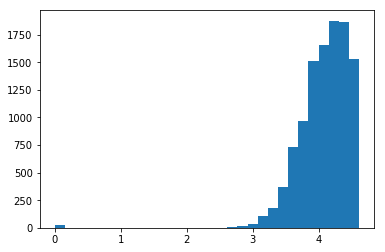

In [24]:
plt.hist(Xdf['lhumidity'], bins=30)
plt.show()

Graficamos entonces el mejor modelo de regresión SVM de esos tres, que es usando la salida en espacio logarítmico, y estandarizando la entrada. Podemos ver en el siguiente gráfico como efectivamente los datos parecen ajustarse más a la recta. Para un clasificador perfecto (error $0$), todos los datos caerían sobre la recta $y = \hat{y}$.

KAGG EVAL TRAIN = 0.218260
KAGG EVAL VALIDATION = 1.519902
KAGG EVAL TEST = 0.323282


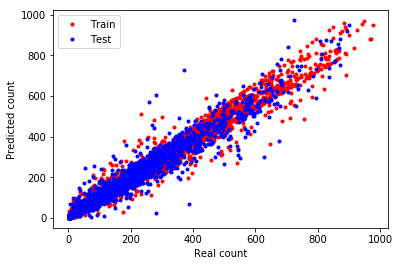

In [25]:
Ydf = (df.loc[:, 'count'] + 1.0).apply(np.log)
show_best_model(Xdf, Ydf, model_gen(), out_log=True, standardize=True)

Concluimos entonces que, sin variar los parámetros de la SVM, obtenemos un modelo con score de test de Kaggle de $0.323$.

## (f)
Mejore la SVM definida en el punto anterior haciendo modificaciones a los hiper-parámetros de la
máquina ($C$, $\epsilon$ o la misma función de kernel). Naturalmente, está absolutamente prohibido tomar este
tipo de decisiones de diseño mirando el resultado de pruebas. Debe realizar estas elecciones evaluando sobre el conjunto de validación. Si no desea utilizarlo, y prefiere implementar validación cruzada
u otra técnica automática, tiene la ventaja de poder usar el conjunto de validación como parte del
entrenamiento.

In [27]:
Ydf = (df.loc[:, 'count'] + 1.0).apply(np.log)

for kernel_try in ['rbf', 'sigmoid', 'linear', 'poly']:
    C = 1.0
    epsilon = 0.1
    kernel = kernel_try
    score_test, train_eval, test_eval = do_cross(Xdf, Ydf, model_gen, out_log=True, standardize=True)
    print('kernel = {} C = {} epsilon = {} SCORE: {} Error train: {} Error test: {}'.format(
        kernel, C, epsilon, score_test, train_eval, test_eval))

for C_try in [0.5, 0.75, 1.0, 1.5, 2.0]:
    C = C_try
    epsilon = 0.1
    kernel = 'rbf'
    score_test, train_eval, test_eval = do_cross(Xdf, Ydf, model_gen, out_log=True, standardize=True)
    print('kernel = {} C = {} epsilon = {} SCORE: {} Error train: {} Error test: {}'.format(
        kernel, C, epsilon, score_test, train_eval, test_eval))

for epsilon_try in [0.025, 0.05, 0.075, 0.1, 0.2]:
    C = 1.0
    epsilon = epsilon_try
    kernel = 'rbf'
    score_test, train_eval, test_eval = do_cross(Xdf, Ydf, model_gen, out_log=True, standardize=True)
    print('kernel = {} C = {} epsilon = {} SCORE: {} Error train: {} Error test: {}'.format(
        kernel, C, epsilon, score_test, train_eval, test_eval))


kernel = rbf C = 1.0 epsilon = 0.1 SCORE: 0.955533257161 Error train: 0.220461149861 Error test: 0.299747032833
kernel = sigmoid C = 1.0 epsilon = 0.1 SCORE: -5.15846240869 Error train: 3.506739212 Error test: 3.35238408478
kernel = linear C = 1.0 epsilon = 0.1 SCORE: 0.817935664247 Error train: 0.610177422962 Error test: 0.604301597792
kernel = poly C = 1.0 epsilon = 0.1 SCORE: 0.95518534779 Error train: 0.199667584322 Error test: 0.301821674145
kernel = rbf C = 0.5 epsilon = 0.1 SCORE: 0.952838775279 Error train: 0.257607670223 Error test: 0.307375168838
kernel = rbf C = 0.75 epsilon = 0.1 SCORE: 0.953681800167 Error train: 0.233913667486 Error test: 0.30551560147
kernel = rbf C = 1.0 epsilon = 0.1 SCORE: 0.956224057307 Error train: 0.221440148694 Error test: 0.297160899262
kernel = rbf C = 1.5 epsilon = 0.1 SCORE: 0.956680460825 Error train: 0.202277677512 Error test: 0.296294855006
kernel = rbf C = 2.0 epsilon = 0.1 SCORE: 0.955134508276 Error train: 0.188673774674 Error test: 0.29

Se varió cada parámetro por separado, por una cosa de tiempo. Lo ideal habría sido probar todas las combinaciones. Los mejores resultados se obtuvieron con el kernel Radial Basis Function, lo cual tiene sentido debido a que los datos están en círculos. Luego, $C = 1.5$ y $\epsilon = 0.1$.

Graficamos entonces este mejor modelo y vemos su puntaje Kaggle, resultando en $0.319$, ligeramente mejor que el anterior. Vemos cómo los datos se acercan aun más a la recta $y = \hat{y}$, lo que significa que la predicción es mejor.

KAGG EVAL TRAIN = 0.199159
KAGG EVAL VALIDATION = 1.538477
KAGG EVAL TEST = 0.318946


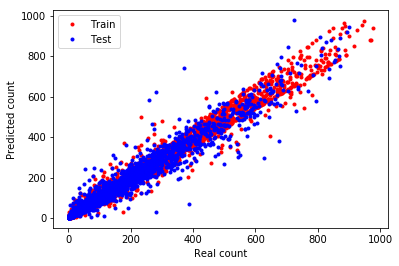

In [29]:
C = 1.5
epsilon = 0.1
kernel = 'rbf'
show_best_model(Xdf, Ydf, model_gen(), out_log=True, standardize=True)

## (g)
Evalúe el efecto de utilizar el dataset de validación para entrenamiento y seleccionar los parámetros
estructurales del árbol de clasificación y la SVM usando validación cruzada. El código de ejemplo para
esto ha sido proporcionado en las tareas 1 y 2, pero se adjunta de nuevo a continuación

En nuestro caso nosotros decidimos usar cross validation desde el comienzo, por lo que no necesitamos realizar todo de nuevo. La razón por la que lo hicimos fue poder aprovechar una mayor cantidad de datos disponibles.

## (h)
Evalúe el efecto de utilizar un ensamblado de 2 máquinas de aprendizaje para predecir la demanda
total de bicicletas. Un modelo se especializará en la predicción de la demanda de bicicletas de parte
de usuarios registrados y otra en la predicción de la demanda de usuarios casuales. Hay razones claras
para pensar que los patrones son distintos.

In [31]:
from sklearn.svm import SVR


df, ntrain, nval = reload_data(print_info=False)

df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek
df['cmonth'] = pd.to_datetime(df['datetime']).dt.month
df['cyear'] = pd.to_datetime(df['datetime']).dt.year
df['hour'] = pd.to_numeric(df['hour'])
df['cday'] = pd.to_numeric(df['cday'])
df['cmonth'] = pd.to_numeric(df['cmonth'])
df['cyear'] = pd.to_numeric(df['cyear'])
Xdf = df.loc[:, ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
                 'humidity', 'windspeed', 'hour', 'cday', 'cmonth', 'cyear']]
# PASO IMPORTANTE MAS ABAJO ...
Xdf = pd.get_dummies(Xdf, columns=['season', 'weather', 'hour', 'cday', 'cmonth', 'cyear'])
Xdf['lhumidity'] = (Xdf['humidity'] + 1.0).apply(np.log)

Ydf_registered = (df.loc[:, 'registered'] + 1.0).apply(np.log)  # demanda registrada
Ydf_casual = (df.loc[:, 'casual'] + 1.0).apply(np.log)  # demanda casual

Ydf = (df.loc[:, 'count'] + 1.0).apply(np.log)  # demanda total

C = 1.5
epsilon = 0.1
kernel = 'rbf'
peso = 0.5


class ModeloEnsembleBasico(object):
    def __init__(self, peso=0.5):
        self._peso = peso
        self._modelo1 = SVR(C=C, epsilon=epsilon, kernel=kernel)
        self._modelo2 = SVR(C=C, epsilon=epsilon, kernel=kernel)

    def fit(self, X, Y_registered, Y_casual):
        self._modelo1.fit(X, Y_registered)
        self._modelo2.fit(X, Y_casual)

    def score(self, X, Y):
        return 0.0

    def predict(self, X):
        Y_1 = self._modelo1.predict(X)
        Y_2 = self._modelo2.predict(X)
        return Y_1 * self._peso + Y_2 * (1.0 - self._peso)

Terminado para peso 0.0 test: 2.01453323125
Terminado para peso 0.2 test: 1.65314555574
Terminado para peso 0.4 test: 1.28627069599
Terminado para peso 0.6 test: 0.927983935061
Terminado para peso 0.8 test: 0.607970927307
Terminado para peso 1.0 test: 0.378695197617


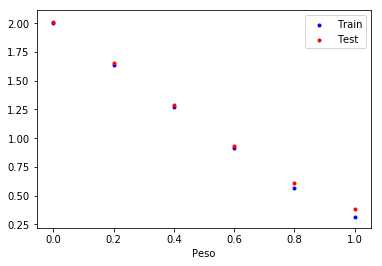

Mejor peso para test: 0.378695197617 : 1.0


In [33]:
def model_gen():
    return ModeloEnsembleBasico(peso=peso)


def do_cross_ensemble(Xdf, Ydf, Ydf_registered, Ydf_casual, model_gen, test_percent=0.3, iterations=10, out_log=False, standardize=False):
    score_test = 0.
    train_eval = 0.
    test_eval = 0.
    for one in range(iterations):
        X_train, X_test, Y_train, Y_test, Y_registered_train, Y_registered_test, Y_casual_train, Y_casual_test = train_test_split(
            Xdf.values, Ydf.values, Ydf_registered.values, Ydf_casual.values, test_size=test_percent)
        model = model_gen()
        if standardize:
            scalerX = StandardScaler()
            X_train = scalerX.fit_transform(X_train)
            X_test = scalerX.transform(X_test)
        model.fit(X_train, Y_registered_train, Y_casual_train)
        score_test += model.score(X_test, Y_test) / iterations
        Y_pred_train = model.predict(X_train)
        Y_pred_test = model.predict(X_test)
        if out_log:
            Y_pred_train = np.exp(Y_pred_train) - 1.0
            Y_pred_test = np.exp(Y_pred_test) - 1.0
            Y_train = np.exp(Y_train) - 1.0
            Y_test = np.exp(Y_test) - 1.0
        train_eval += eval_bikemodel(np.maximum([0.0] * len(Y_pred_train), Y_pred_train),
                                     np.maximum([0.0] * len(Y_train), Y_train)) / iterations
        test_eval += eval_bikemodel(np.maximum([0.0] * len(Y_pred_test), Y_pred_test),
                                    np.maximum([0.0] * len(Y_test), Y_test)) / iterations
    return score_test, train_eval, test_eval

pesos = [2.0 * pesol / 10.0 for pesol in range(6)]
best_score = -1
best_test = 10
best_score_depth = 0
best_test_depth = 0
scores = []
train_evals = []
test_evals = []
for pesol in pesos:
    peso = pesol
    score_test, train_eval, test_eval = do_cross_ensemble(Xdf, Ydf, Ydf_registered, Ydf_casual, model_gen,
                                                          iterations=5, out_log=True, standardize=True)
    print 'Terminado para peso {} test: {}'.format(peso, test_eval)
    scores.append(score_test)
    train_evals.append(train_eval)
    test_evals.append(test_eval)
    if best_score < score_test:
        best_score = score_test
        best_score_depth = pesol
    if best_test > test_eval:
        best_test = test_eval
        best_test_depth = pesol

plt.scatter(pesos, train_evals, color='blue', label='Train', marker='.')
plt.scatter(pesos, test_evals, color='red', label='Test', marker='.')
plt.xlabel('Peso')
plt.legend()
plt.show()

print('Mejor peso para test: {} : {}'.format(best_test, best_test_depth))

Se entrenó un modelo SVM de regresión estimando la demanda casual y otro la demanda por usuarios registrados, usando los mismos hiperparámetros encontrados para el modelo general de la parte (f). Como en algunos casos la demanda era $0$, no se podía aplicar la función $\log$ directamente, por lo que se sumó $1$ a todos los datos.

Luego, se usó un ensemble de ambos modelos que los promedia, ponderando linealmente más un modelo que otro, de acuerdo a un parámetro de peso. Para elegir el parámetro más apropiado, se realizó validación cruzada, concluyendo que el mejor valor de peso es $1$. Es decir, se considera sólo el modelo de demanda de usuarios registrados.

Finalmente, en el gráfico vemos cómo se ajustan los datos de entrenamiento y test.

KAGG EVAL TRAIN = 0.312469
KAGG EVAL VALIDATION = 1.600942
KAGG EVAL TEST = 0.391325


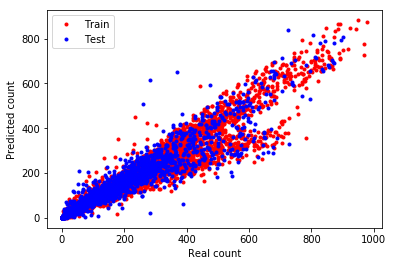

In [34]:
def show_best_model_ensemble(Xdf, Ydf, Ydf_registered, Ydf_casual, model, out_log=False, standardize=False):
    X_train_kaggle = Xdf[:ntrain]
    Y_train_kaggle = Ydf[:ntrain]
    X_val_kaggle = Xdf[ntrain:nval]
    Y_val_kaggle = Ydf[ntrain:nval]
    X_test_kaggle = Xdf[nval:]
    Y_test_kaggle = Ydf[nval:]
    if standardize:
        scalerX = StandardScaler()
        X_train_kaggle = scalerX.fit_transform(X_train_kaggle)
        X_test_kaggle = scalerX.transform(X_test_kaggle)
    model.fit(X_train_kaggle, Ydf_registered[:ntrain], Ydf_casual[:ntrain])
    Y_pred_train = model.predict(X_train_kaggle)
    Y_pred_val = model.predict(X_val_kaggle)
    Y_pred_test = model.predict(X_test_kaggle)
    if out_log:
        Y_pred_train = np.exp(Y_pred_train) - 1.0
        Y_pred_val = np.exp(Y_pred_val) - 1.0
        Y_pred_test = np.exp(Y_pred_test) - 1.0
        Y_train_kaggle = np.exp(Y_train_kaggle) - 1.0
        Y_val_kaggle = np.exp(Y_val_kaggle) - 1.0
        Y_test_kaggle = np.exp(Y_test_kaggle) - 1.0
    kagg_train = eval_bikemodel(Y_pred_train, Y_train_kaggle)
    kagg_val = eval_bikemodel(Y_pred_val, Y_val_kaggle)
    kagg_test = eval_bikemodel(Y_pred_test, Y_test_kaggle)
    print 'KAGG EVAL TRAIN = %f' % kagg_train
    print 'KAGG EVAL VALIDATION = %f' % kagg_val
    print 'KAGG EVAL TEST = %f' % kagg_test
    plt.plot(Y_train_kaggle, Y_pred_train, '.', color='red', label='Train')
    plt.plot(Y_test_kaggle, Y_pred_test, '.', color='blue', label='Test')
    plt.xlabel('Real count')
    plt.ylabel('Predicted count')
    plt.legend()
    plt.show()

peso = 1.0  # Mejor parametro segun cross validation
show_best_model_ensemble(Xdf, Ydf, Ydf_registered, Ydf_casual, model_gen(), out_log=True, standardize=True)

En conclusión, este modelo básico de ensemble que realiza un promedio ponderado entre un predictor de la demanda de usuarios registrados y demanda de usuarios casuales, termina basándose totalmente en el modelo de los usuarios registrados (debido probablemente a una mayor correlación), y los resultados no son mejores que el modelo directo. Al entender que en verdad la cantidad total de demanda es la suma de los dos, y no un promedio ponderado, repetimos el ejercicio, pero sin considerar el parámetro peso:

KAGG EVAL TRAIN = 0.200320
KAGG EVAL VALIDATION = 1.550982
KAGG EVAL TEST = 0.317823


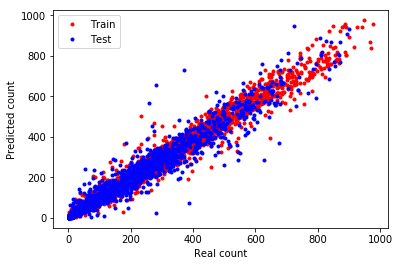

In [40]:
class ModeloEnsembleSimple(object):
    def __init__(self):
        self._modelo1 = SVR(C=C, epsilon=epsilon, kernel=kernel)
        self._modelo2 = SVR(C=C, epsilon=epsilon, kernel=kernel)

    def fit(self, X, Y_registered, Y_casual):
        self._modelo1.fit(X, Y_registered)
        self._modelo2.fit(X, Y_casual)

    def score(self, X, Y):
        return 0.0

    def predict(self, X):
        Y_1 = self._modelo1.predict(X)
        Y_2 = self._modelo2.predict(X)
        return np.log(np.exp(Y_1) - 1.0 + np.exp(Y_2) - 1.0 + 1.0)


def model_gen():
    return ModeloEnsembleSimple()

show_best_model_ensemble(Xdf, Ydf, Ydf_registered, Ydf_casual, model_gen(), out_log=True, standardize=True)

Este nuevo ensemble que se basa en estimar la demanda separada de usuarios registrados y de usuarios casuales, resulta entonces el mejor modelo para los datos de Kaggle, obteniendo un error de $0.318$, aun mejor que en el caso de la SVM con los parámetros ajustados.

## (i)
Evalúe el efecto de utilizar un algoritmo genérico para ensamblar máquinas de aprendizaje para predecir
la demanda total de bicicletas. Puede experimentar con una sola técnica (e.g. Random Forest), discuta
la evolución a medida que aumenta el número de máquinas.

In [14]:
from sklearn.ensemble import RandomForestRegressor


df, ntrain, nval = reload_data(print_info=False)

df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek
df['cmonth'] = pd.to_datetime(df['datetime']).dt.month
df['cyear'] = pd.to_datetime(df['datetime']).dt.year
df['hour'] = pd.to_numeric(df['hour'])
df['cday'] = pd.to_numeric(df['cday'])
df['cmonth'] = pd.to_numeric(df['cmonth'])
df['cyear'] = pd.to_numeric(df['cyear'])
Xdf = df.loc[:, ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
                 'humidity', 'windspeed', 'hour', 'cday', 'cmonth', 'cyear']]
# PASO IMPORTANTE MAS ABAJO ...
Xdf = pd.get_dummies(Xdf, columns=['season', 'weather', 'hour', 'cday', 'cmonth', 'cyear'])

Ydf = (df.loc[:, 'count'] + 1.0).apply(np.log)  # demanda total


n_estimators = 10
max_depth = 12


def model_gen():
    return RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=0)

depths = range(4, 41, 2)
estimators = range(4, 41, 2)

best_score = -1
best_test = 10
best_score_depth = 0
best_score_estimator = 0
best_test_depth = 0
best_test_estimator = 0
scores = {}
train_evals = {}
test_evals = {}
for depth in depths:
    for estimator in estimators:
        max_depth = depth
        n_estimators = estimator
        score_test, train_eval, test_eval = do_cross(Xdf, Ydf, model_gen, out_log=True, standardize=True)
        print 'Depth {} Estimators {} test: {}'.format(depth, estimator, test_eval)
        scores[(depth, estimator)] = score_test
        train_evals[(depth, estimator)] = train_eval
        test_evals[(depth, estimator)] = test_eval
        if best_score < score_test:
            best_score = score_test
            best_score_depth = depth
            best_score_estimator = estimator
        if best_test > test_eval:
            best_test = test_eval
            best_test_depth = depth
            best_test_estimator = estimator

Depth 4 Estimators 4 test: 0.973285196535
Depth 4 Estimators 6 test: 0.977415508138
Depth 4 Estimators 8 test: 0.972105331135
Depth 4 Estimators 10 test: 0.976246443319
Depth 4 Estimators 12 test: 0.980025402998
Depth 4 Estimators 14 test: 0.978181326697
Depth 4 Estimators 16 test: 0.968995897325
Depth 4 Estimators 18 test: 0.981535755245
Depth 4 Estimators 20 test: 0.972836860572
Depth 4 Estimators 22 test: 0.978423543936
Depth 4 Estimators 24 test: 0.977387160032
Depth 4 Estimators 26 test: 0.983993856159
Depth 4 Estimators 28 test: 0.976516809817
Depth 4 Estimators 30 test: 0.976111555548
Depth 4 Estimators 32 test: 0.973825948701
Depth 4 Estimators 34 test: 0.976790237096
Depth 4 Estimators 36 test: 0.973735162559
Depth 4 Estimators 38 test: 0.968266769866
Depth 4 Estimators 40 test: 0.973867689705
Depth 6 Estimators 4 test: 0.802921656402
Depth 6 Estimators 6 test: 0.794410370112
Depth 6 Estimators 8 test: 0.790059570011
Depth 6 Estimators 10 test: 0.793427168477
Depth 6 Estimator

Depth 22 Estimators 40 test: 0.347899192217
Depth 24 Estimators 4 test: 0.396068078334
Depth 24 Estimators 6 test: 0.370114537998
Depth 24 Estimators 8 test: 0.367369933855
Depth 24 Estimators 10 test: 0.361134166156
Depth 24 Estimators 12 test: 0.356665311446
Depth 24 Estimators 14 test: 0.361242854812
Depth 24 Estimators 16 test: 0.350678545388
Depth 24 Estimators 18 test: 0.35266510258
Depth 24 Estimators 20 test: 0.351509953904
Depth 24 Estimators 22 test: 0.351299509815
Depth 24 Estimators 24 test: 0.354233214597
Depth 24 Estimators 26 test: 0.345965377071
Depth 24 Estimators 28 test: 0.352802489309
Depth 24 Estimators 30 test: 0.349085863225
Depth 24 Estimators 32 test: 0.34527330144
Depth 24 Estimators 34 test: 0.343324359485
Depth 24 Estimators 36 test: 0.342284857845
Depth 24 Estimators 38 test: 0.340529076244
Depth 24 Estimators 40 test: 0.341690127627
Depth 26 Estimators 4 test: 0.389752089049
Depth 26 Estimators 6 test: 0.365834937263
Depth 26 Estimators 8 test: 0.361164823

Realizamos un barrido por las combinaciones de los parámetros de profundidad de los árboles y la cantidad de estimadores o árboles diferentes, obteniendo el mejor valor de profundidad de $32$ y el mejor valor de estimadores $36$. A partir de estos valores vemos a continuación gráficos de cómo varía el error de entrenamiento y test al cambiar el otro parámetro.

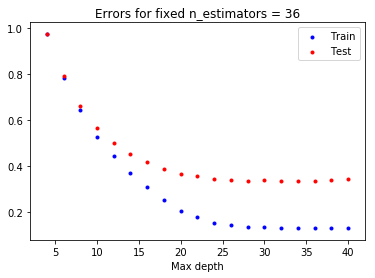

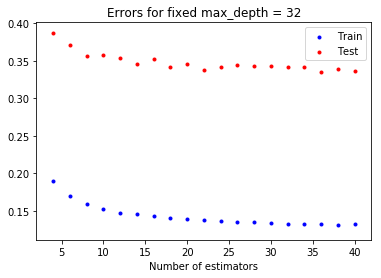

KAGG EVAL TRAIN = 0.135639
KAGG EVAL VALIDATION = 1.479737
KAGG EVAL TEST = 0.370864


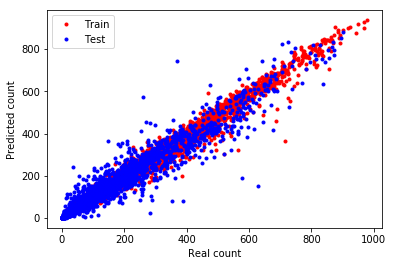

In [15]:
max_depth = 32
n_estimators = 36

train_values = [train_evals[(depth, n_estimators)] for depth in depths]
test_values = [test_evals[(depth, n_estimators)] for depth in depths]
plt.scatter(depths, train_values, color='blue', label='Train', marker='.')
plt.scatter(depths, test_values, color='red', label='Test', marker='.')
plt.xlabel('Max depth')
plt.title('Errors for fixed n_estimators = {}'.format(n_estimators))
plt.legend()
plt.show()

train_values = [train_evals[(max_depth, estimator)] for estimator in estimators]
test_values = [test_evals[(max_depth, estimator)] for estimator in estimators]
plt.scatter(estimators, train_values, color='blue', label='Train', marker='.')
plt.scatter(estimators, test_values, color='red', label='Test', marker='.')
plt.xlabel('Number of estimators')
plt.title('Errors for fixed max_depth = {}'.format(max_depth))
plt.legend()
plt.show()

show_best_model(Xdf, Ydf, model_gen(), out_log=True, standardize=True)

Vemos que a partir de un valor de profundidad del árbol, los resultados no mejoran y pueden empezar a empeorar debido a sobre ajuste, pero de manera pequeña, probablemente debido a que la gran cantidad de árboles hace que el sobreajuste tienda a disminuir. Con respecto al parámetro de cantidad de estimadores, vemos que el error tiende a disminuir al aumentar la cantidad. Esto tiene sentido pues cada nuevo árbol que se agrega incluye atributos diferentes. Al agregar una cantidad de árboles grande, la probabilidad de que se hayan considerado ya todos los atributos aumenta, convergiendo a una tasa de error mínima dada por los datos y el problema.